# Concrete Compressive Strength.
**Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.**

**Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.**

### Import & Understand Data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel(r"G:\Other computers\My Computer (1)\__Jupyter\Elector_Pi\Concrete_Data.xlsx",parse_dates=["Age (day)"])
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
# Rename Columns
a={}
for l in df.columns:
    a[l]=l.split("(")[0]
df.rename(columns=a,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1030 entries, 0 to 1029

Data columns (total 9 columns):

 #   Column                         Non-Null Count  Dtype  

---  ------                         --------------  -----  

 0   Cement                         1030 non-null   float64

 1   Blast Furnace Slag             1030 non-null   float64

 2   Fly Ash                        1030 non-null   float64

 3   Water                          1030 non-null   float64

 4   Superplasticizer               1030 non-null   float64

 5   Coarse Aggregate               1030 non-null   float64

 6   Fine Aggregate                 1030 non-null   float64

 7   Age                            1030 non-null   object 

 8   Concrete compressive strength  1030 non-null   float64

dtypes: float64(8), object(1)

memory usage: 72.5+ KB


In [8]:
# Check If There're Missing Values
df.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,82.599225


In [10]:
df.sort_values(by=['Age '],inplace=True)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
763,385.00,0.00,0.00,186.00,0.00,966.00,763.00,1,6.267337
746,500.00,0.00,0.00,200.00,0.00,1125.00,613.00,1,12.638095
233,213.72,98.05,24.51,181.71,6.86,1065.80,785.38,100,53.903234
303,290.35,0.00,96.18,168.08,9.41,961.18,865.00,100,48.973480
298,168.88,42.22,124.25,158.33,10.83,1080.80,796.15,100,48.153004
...,...,...,...,...,...,...,...,...,...
167,475.00,118.80,0.00,181.10,8.90,852.10,781.50,91,74.194512
163,313.30,262.20,0.00,175.50,8.60,1046.90,611.80,91,66.596487
166,375.00,93.80,0.00,126.60,23.40,852.10,992.60,91,62.500999
175,362.60,189.00,0.00,164.90,11.60,944.70,755.80,91,79.296635


<AxesSubplot: ylabel='Frequency'>

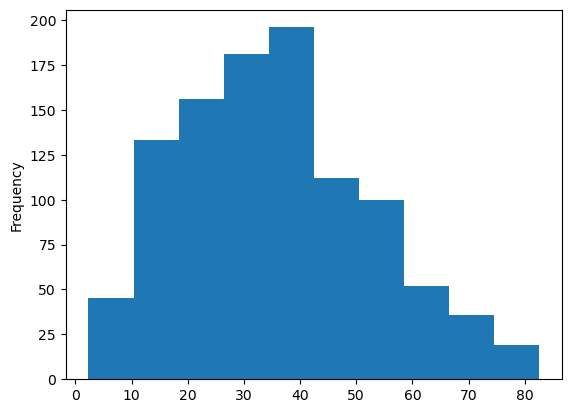

In [11]:
df["Concrete compressive strength"].plot(kind='hist')

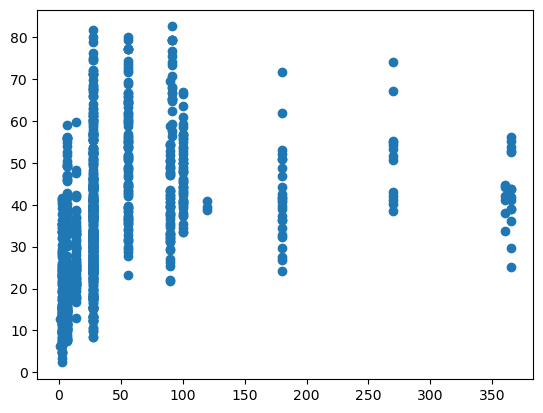

In [12]:
plt.scatter(df["Age "].astype(float),df["Concrete compressive strength"])

# df["Concrete compressive strength"].groupby(df["Age "]).groups()

<Figure size 400x400 with 0 Axes>

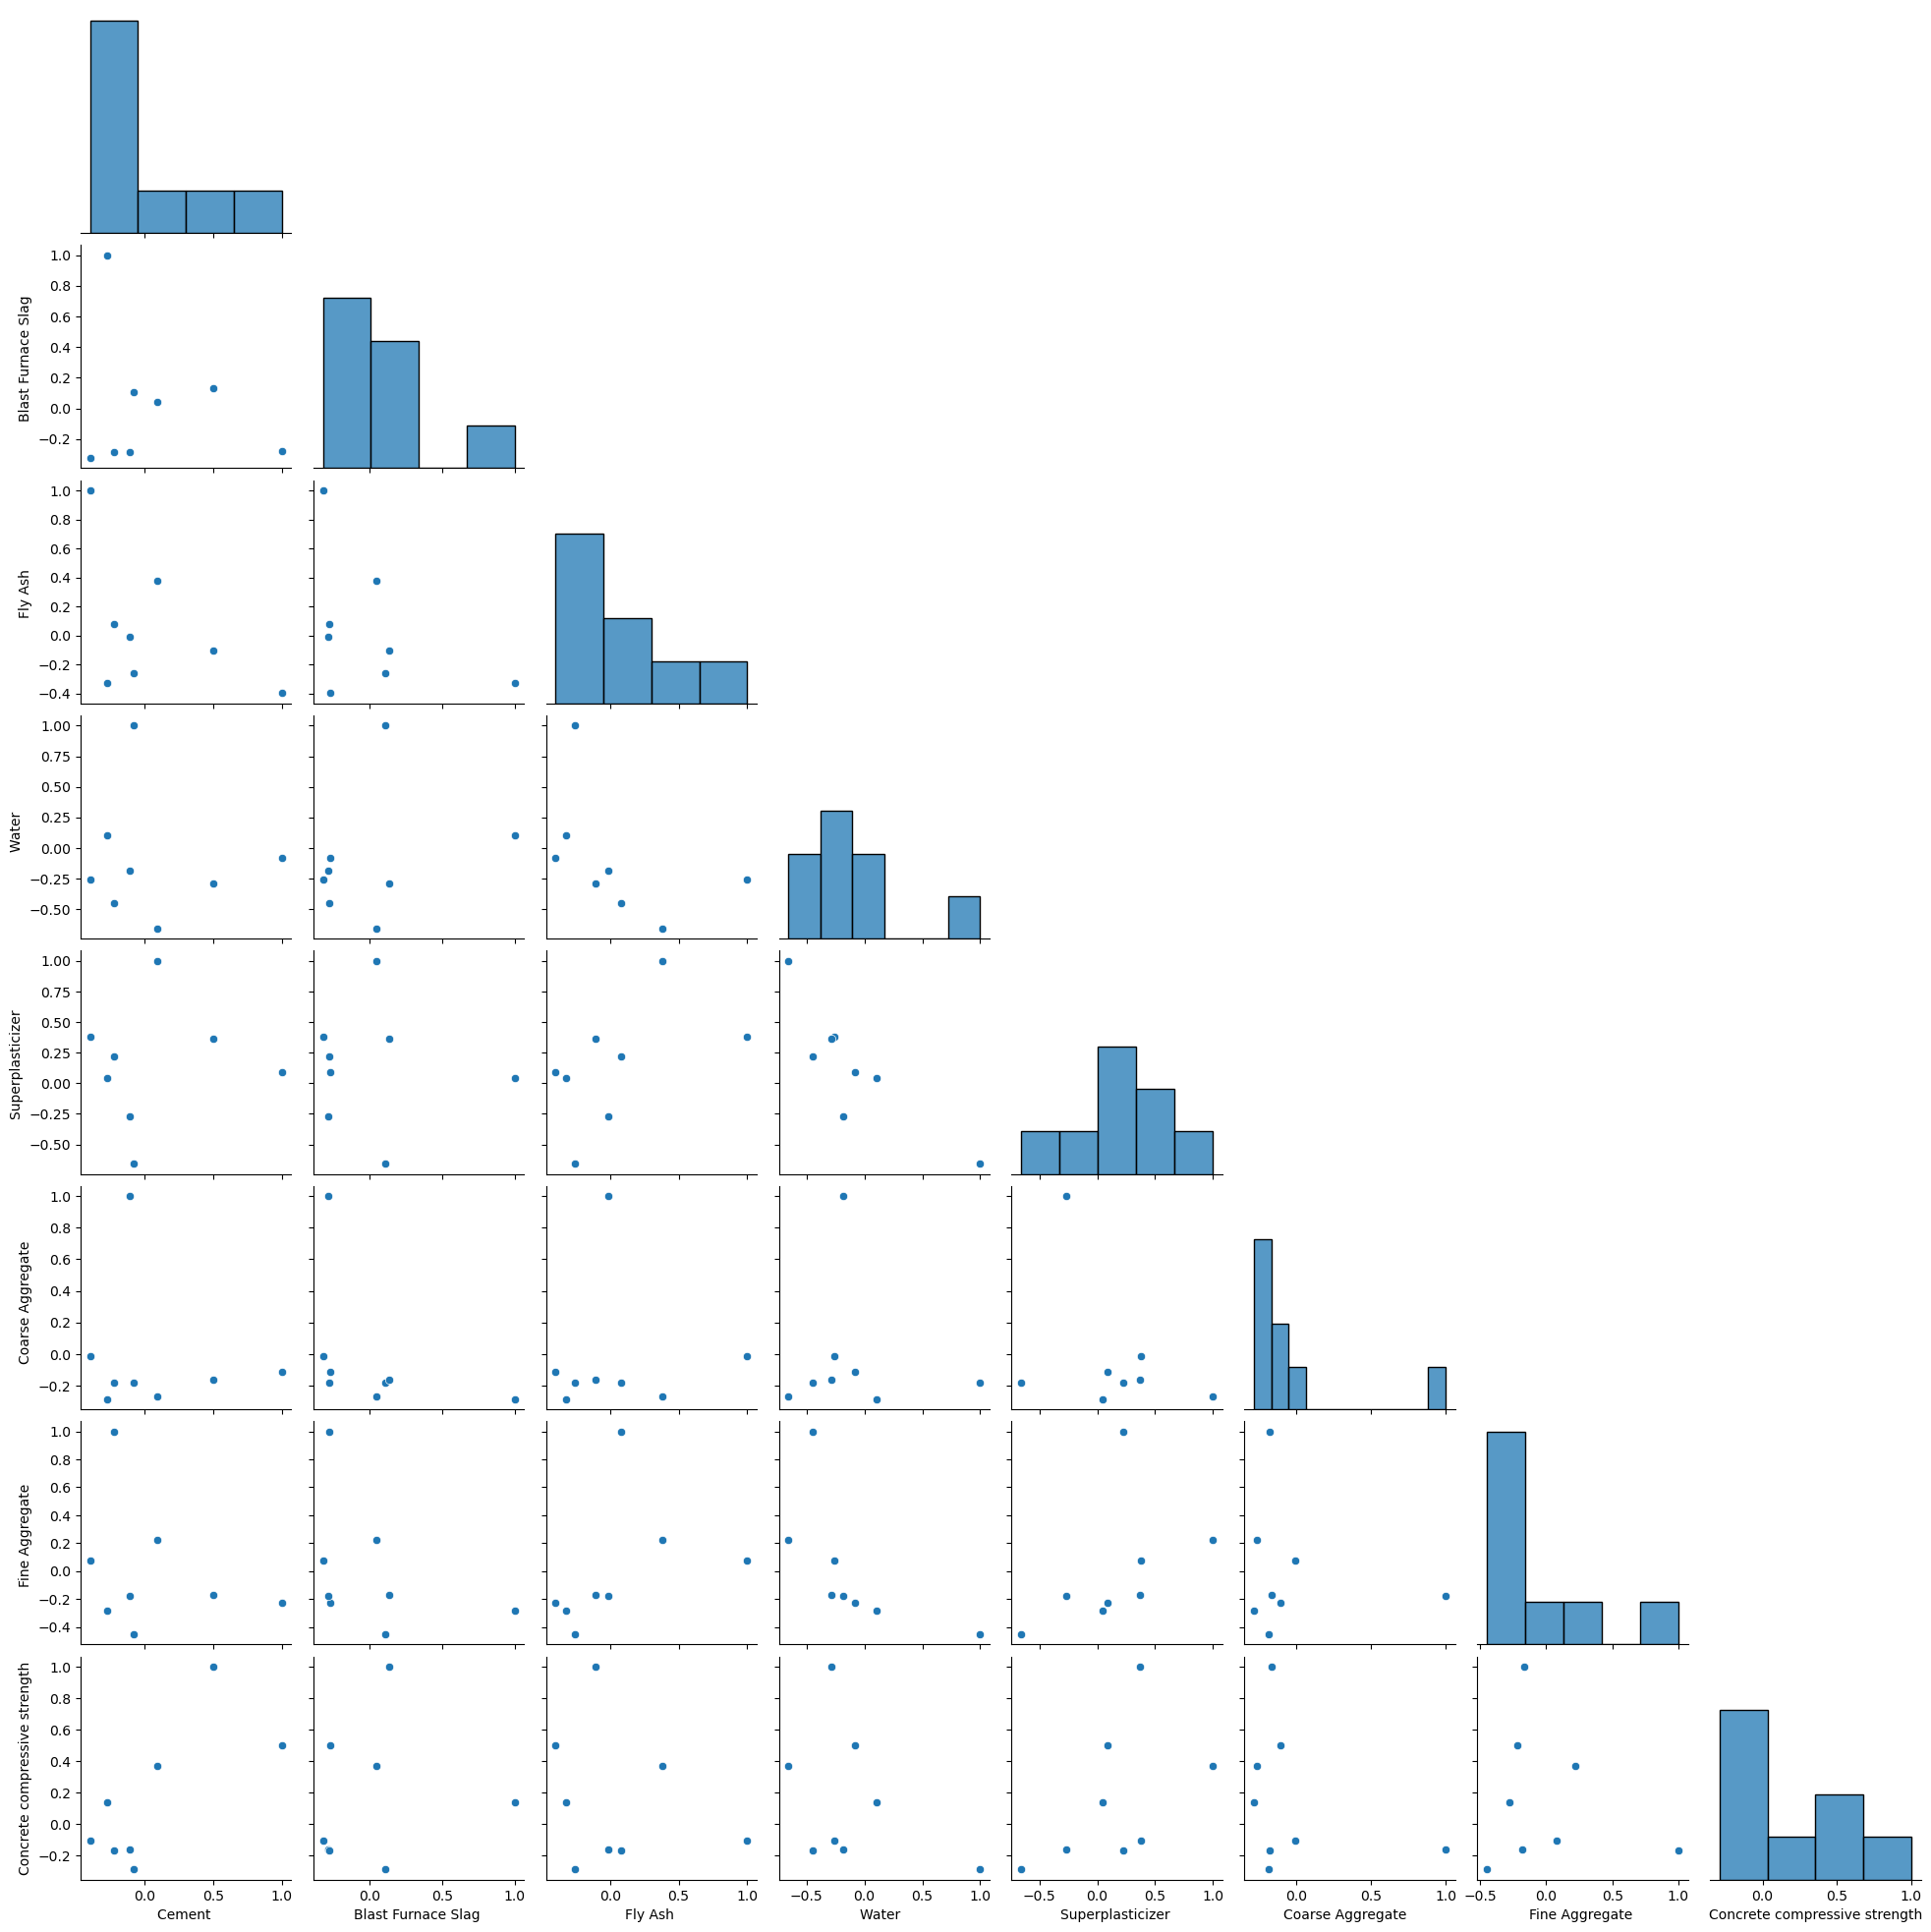

In [17]:
plt.figure(figsize=(4,4))
sns.pairplot(df.corr(),corner=True)

<AxesSubplot: >

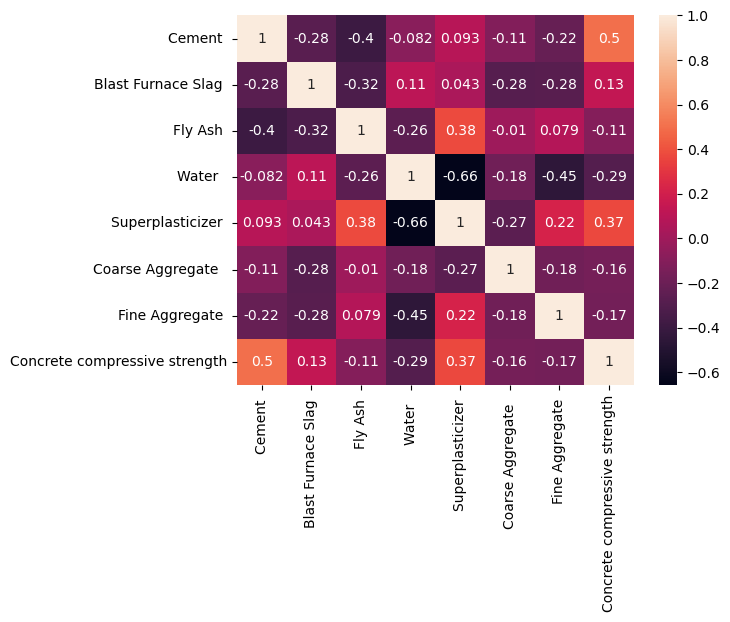

In [18]:
sns.heatmap(df.corr(),annot=True)

### Splitting , Preprocessing & set Pipeline

In [147]:
x=df.drop('Concrete compressive strength',axis=1)
y=df['Concrete compressive strength']

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pf_trans=Pipeline([('pf',PolynomialFeatures())])

labs=["Age "]
lab_trans=Pipeline(steps=[("ohe",OneHotEncoder(handle_unknown="ignore",drop="first"))])

num=x.columns.drop("Age ")
ss_trans=Pipeline(steps=[("ss",StandardScaler())])

preprocessor=ColumnTransformer([("lab_trans",lab_trans,labs),("ss_trans",ss_trans,num)])

In [21]:
model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",LinearRegression(n_jobs=-1))])
model.fit(x_tr,y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('lab_trans',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Age ']),
                                                 ('ss_trans',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate '],
      dtype='object'))])),
                ('pf_trans', Pipeline(steps=[('pf', PolynomialFeatures())])),
                ('model', LinearRegression(n_jobs=-1

In [22]:
print(model.score(x_tr,y_tr))
model.score(x_te,y_te)

0.9035008938182362


-1.0375931947817642e+23

## Build Models
* Try All Models "Basic"
* Try cross_val_score `Gives Errors` 
* Pick Best Models For Tunning

In [164]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

def try_basic(x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,models=[Lasso,Ridge,KNeighborsRegressor,SVR,RandomForestRegressor,AdaBoostRegressor,XGBRegressor,SGDRegressor]):
    m_sc={}
    for mo in models:
        model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",mo())])
        model.fit(x_train,y_train)
        y_pre=model.predict(x_test)
        MAE=mean_absolute_error(y_test,y_pre)
        MSE=mean_squared_error(y_test,y_pre)
        MSLE=mean_squared_log_error(y_test,y_pre)
        R2=r2_score(y_test,y_pre)
        score=model.score(x_test,y_test)
        m_sc[str(mo()).split("(")[0]]=[MAE,MSE,MSLE,R2,score]
        scrs=pd.DataFrame(m_sc,index=['MAE','MSE','MSLE','R2','Score'])
    # Plot Each Metric
    l=0
    plt.figure(figsize=(9,20))
    # plt.figure(edgecolor='k')
    for i,c in zip(scrs.index,['orange','k','grey','blue','salmon']):
        plt.subplot(5,1,l+1)
        y=[f"{x} : ({y.round(2)})" for x,y in zip(scrs.columns,scrs.loc[i].values)]
        scrs.loc[i].plot(kind='barh',title=f"{i} Scores",color=c,edgecolor='k')
        plt.yticks(range(0,len(y)),y)
        l+=1
    return scrs

,Lasso,Ridge,KNeighborsRegressor,SVR,RandomForestRegressor,AdaBoostRegressor,XGBRegressor,SGDRegressor
MAE,8.196751,4.251209,6.093493,9.228014,4.134579,8.729998,3.387613,4.707178
MSE,99.662556,29.648537,64.019578,134.780675,32.618484,113.036099,25.986288,35.561496
MSLE,0.108150,0.026004,0.050359,0.156662,0.027264,0.147609,0.021648,0.030424
R2,0.613233,0.884941,0.751555,0.476948,0.873415,0.561333,0.899153,0.861994
Score,0.613233,0.884941,0.751555,0.476948,0.873415,0.561333,0.899153,0.861994


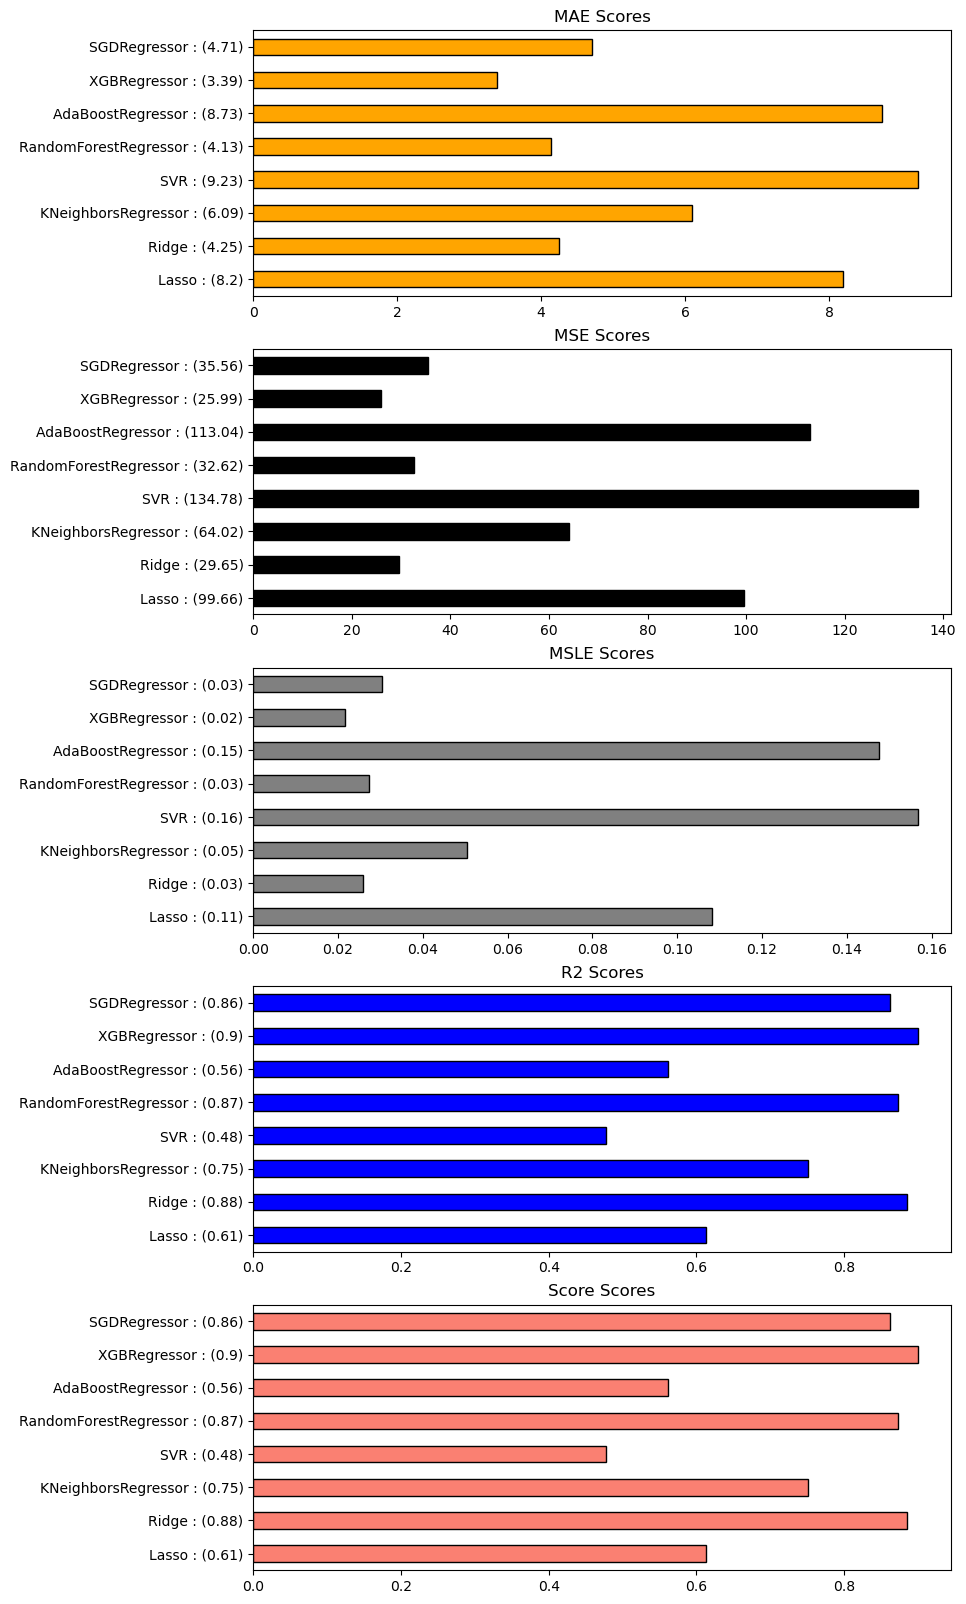

In [165]:
try_basic()

## Tunning Model

In [531]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,plot_confusion_matrix,mean_absolute_percentage_error



def try_it(mo,mo_na,grid,sc='r2',x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,itr=20,ver=1,c=5):
    """
    Try all Classifiers & Return Scores in Shape of DataFrame,
    & Plot Each in Horizontal bars
    """
    RS_model=RandomizedSearchCV(mo,grid,scoring=sc,cv=c,verbose=ver,n_iter=itr)
    RS_model.fit(x_train,y_train)
    
    # Pirnt Model Name
    print(f"{mo_na}")
    
    
    # DataFrame For Scores
    m_sc={}
    te_y_pre=RS_model.predict(x_test)
    tr_y_pre=RS_model.predict(x_train)
    
    tr_MAE=mean_absolute_error(y_train,tr_y_pre)
    MAE=mean_absolute_error(y_test,te_y_pre)

    tr_MAPE=mean_absolute_percentage_error(y_train,tr_y_pre)
    MAPE=mean_absolute_percentage_error(y_test,te_y_pre)

    tr_MSE=mean_squared_error(y_train,tr_y_pre)
    MSE=mean_squared_error(y_test,te_y_pre)

    tr_R2=r2_score(y_train,tr_y_pre)
    R2=r2_score(y_test,te_y_pre)
    
    tr_Score=RS_model.score(x_train,y_train)
    Score=RS_model.score(x_test,y_test)

    m_sc[f'{mo_na} Train']=[tr_MAE,tr_MAPE,tr_MSE,tr_R2,tr_Score]
    m_sc[f'{mo_na} Test']=[MAE,MAPE,MSE,R2,Score]
    
    # Scores DataFrame
    data=pd.DataFrame(m_sc,index=['MAE','MAPE','MSE','R2',"Score"])
    
    # Best Params
    print(RS_model.best_params_,'\n',RS_model.best_score_.round(4))
    
    # Plot
    l=0
    plt.figure(figsize=(20,15))
    for i,c in zip(data.index,['orange','blue','salmon','grey','red']):
        plt.subplot(5,1,l+1)
        x_tic=[f"{x} {round(y,2)}" for x,y in zip(data.columns,data.loc[i])]
        data.loc[i].plot(kind='barh',color=c,title=i)
        plt.yticks(np.arange(0,len(x_tic)),x_tic)
        l+=1
    
    return data.T

In [380]:
def final(mo,mo_na,grid,sc='r2',x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,ver=1):
    """
    Finalize Classifiers & Return Scores in Shape of DataFrame,
    & Plot Each in Horizontal bars
    """
    RS_model=GridSearchCV(mo,grid,scoring=sc,cv=5,verbose=ver)
    RS_model.fit(x_train,y_train)
    
    # Pirnt Model Name
    print(f"{mo_na}")
    
    
    # DataFrame For Scores
    m_sc={}
    te_y_pre=RS_model.predict(x_test)
    tr_y_pre=RS_model.predict(x_train)
    
    tr_MAE=mean_absolute_error(y_train,tr_y_pre)
    MAE=mean_absolute_error(y_test,te_y_pre)

    tr_MAPE=mean_absolute_percentage_error(y_train,tr_y_pre)
    MAPE=mean_absolute_percentage_error(y_test,te_y_pre)

    tr_MSE=mean_squared_error(y_train,tr_y_pre)
    MSE=mean_squared_error(y_test,te_y_pre)

    tr_R2=r2_score(y_train,tr_y_pre)
    R2=r2_score(y_test,te_y_pre)
    
    tr_Score=RS_model.score(x_train,y_train)
    Score=RS_model.score(x_test,y_test)

    m_sc[f'{mo_na} Train']=[tr_MAE,tr_MAPE,tr_MSE,tr_R2,tr_Score]
    m_sc[f'{mo_na} Test']=[MAE,MAPE,MSE,R2,Score]
    
    # Scores DataFrame
    data=pd.DataFrame(m_sc,index=['MAE','MAPE','MSE','R2',"Score"])
    
    # Best Params
    print(RS_model.best_params_,'\n',RS_model.best_score_.round(4))
    
    # Plot
    l=0
    plt.figure(figsize=(20,15))
    for i,c in zip(data.index,['orange','blue','salmon','grey','red']):
        plt.subplot(5,1,l+1)
        x_tic=[f"{x} {round(y,2)}" for x,y in zip(data.columns,data.loc[i])]
        data.loc[i].plot(kind='barh',color=c,title=i)
        plt.yticks(np.arange(0,len(x_tic)),x_tic)
        l+=1
    
    return data.T

### XGBRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__colsample_bytree=1.0, model__gamma=0.8888888888888888, model__learning_rate=0.001, model__max_depth=3, model__n_estimators=100, model__reg_alpha=0.0001, model__reg_lambda=0.1, model__subsample=0.5, pf_trans__pf__degree=4;, score=-2.917 total time=   1.9s

[CV 2/5] END model__colsample_bytree=1.0, model__gamma=0.8888888888888888, model__learning_rate=0.001, model__max_depth=3, model__n_estimators=100, model__reg_alpha=0.0001, model__reg_lambda=0.1, model__subsample=0.5, pf_trans__pf__degree=4;, score=-3.527 total time=   1.9s

[CV 3/5] END model__colsample_bytree=1.0, model__gamma=0.8888888888888888, model__learning_rate=0.001, model__max_depth=3, model__n_estimators=100, model__reg_alpha=0.0001, model__reg_lambda=0.1, model__subsample=0.5, pf_trans__pf__degree=4;, score=-3.314 total time=   2.1s

[CV 4/5] END model__colsample_bytree=1.0, model__gamma=0.8888888888888888, model__learning_rate=0.001, model_

,MAE,MAPE,MSE,R2,Score
XGBRegressor Train,0.563958,0.020925,1.196927,0.995787,0.995787
XGBRegressor Test,3.400695,0.105303,24.329622,0.905582,0.905582


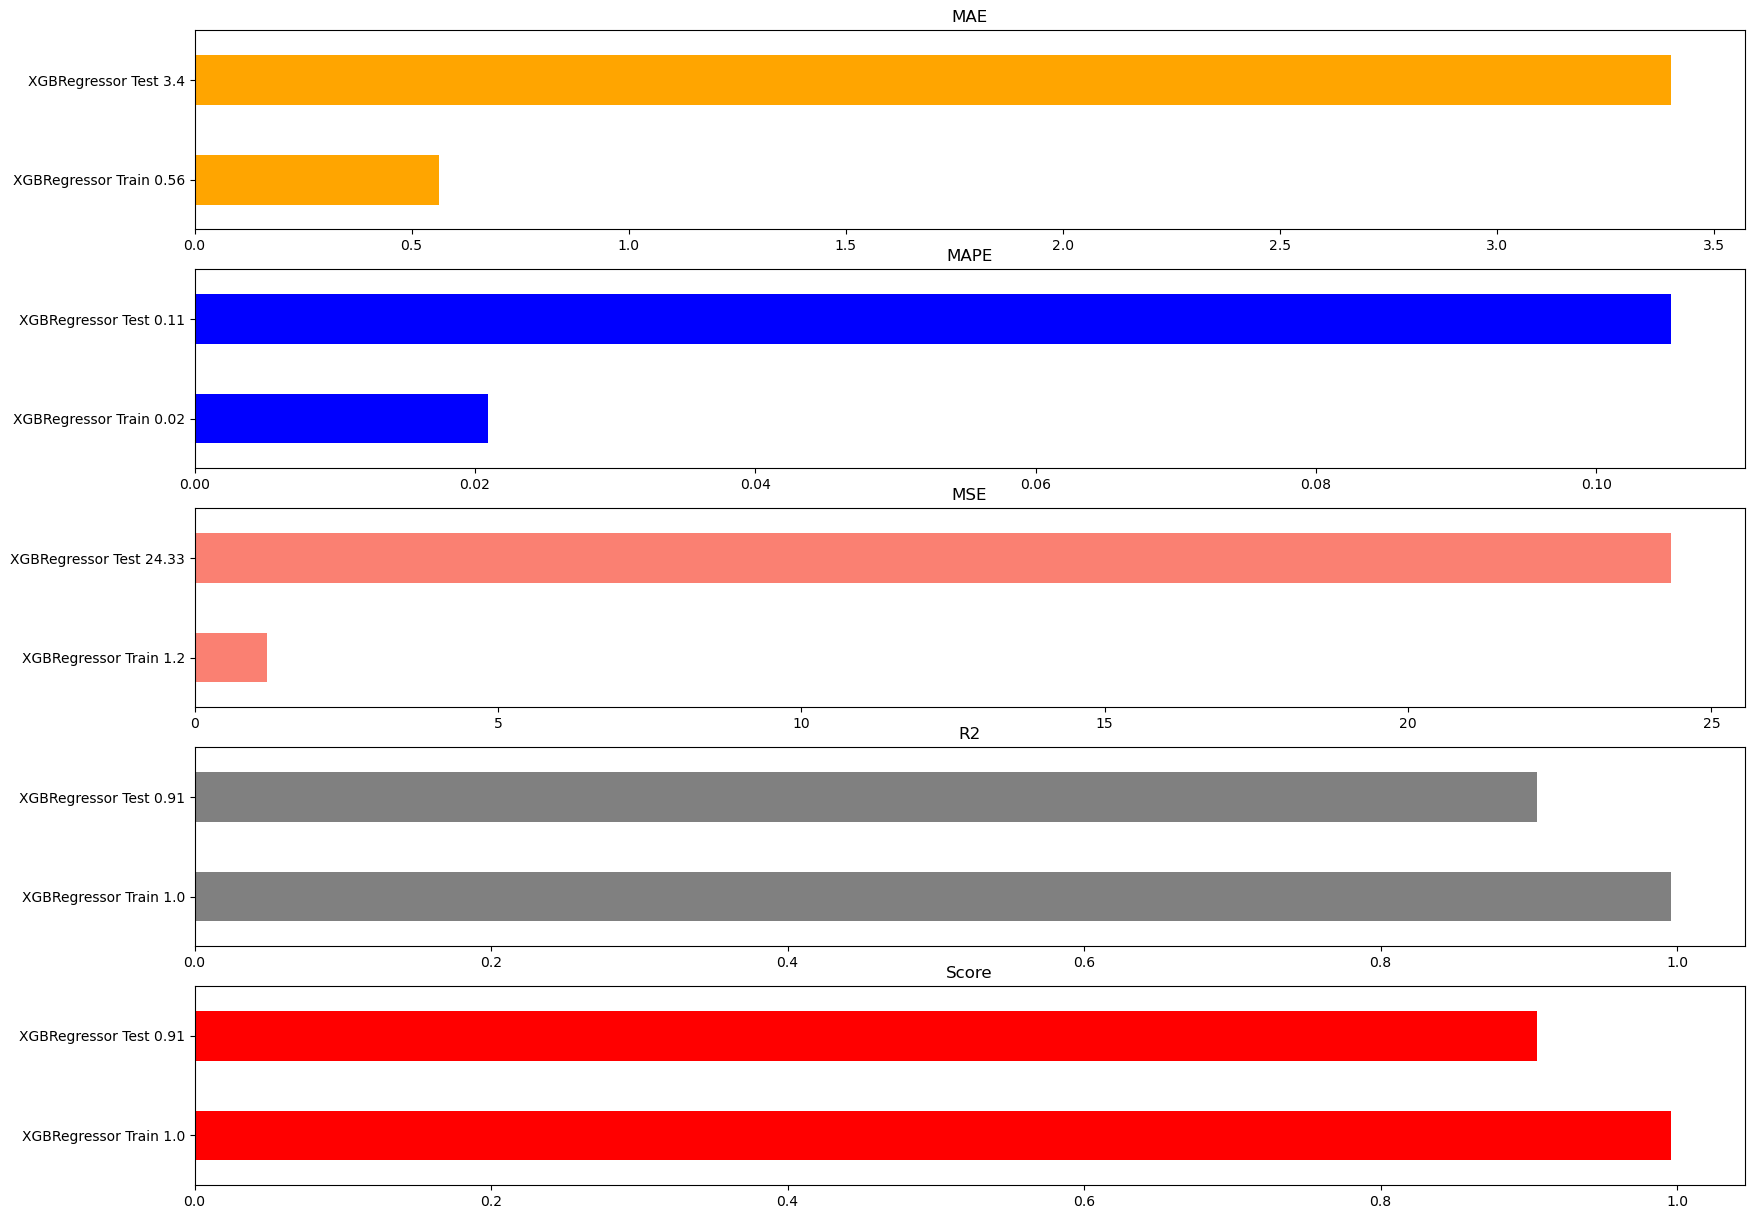

In [352]:
np.random.seed(42)

xgb_grid = {"pf_trans__pf__degree":np.asarray([2,3,4]),
            'model__n_estimators': np.arange(50, 500, 50),
            'model__learning_rate': np.logspace(-4, 0, num=5),
            'model__max_depth': np.arange(3, 10),
            'model__subsample': np.linspace(0.1, 1, 10),
            'model__colsample_bytree': np.linspace(0.1, 1, 10),
            'model__gamma': np.linspace(0, 1, 10),
            'model__reg_alpha': np.logspace(-4, 0, num=5),
            'model__reg_lambda': np.logspace(-4, 0, num=5)}

xgb_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",XGBRegressor())])
try_it(xgb_model,"XGBRegressor",xgb_grid,itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__colsample_bytree=0.5, model__gamma=0.0, model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__reg_alpha=1.0, model__reg_lambda=0.001, model__subsample=0.1, pf_trans__pf__degree=4;, score=-76.880 total time=   2.0s

[CV 2/5] END model__colsample_bytree=0.5, model__gamma=0.0, model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__reg_alpha=1.0, model__reg_lambda=0.001, model__subsample=0.1, pf_trans__pf__degree=4;, score=-66.350 total time=   1.9s

[CV 3/5] END model__colsample_bytree=0.5, model__gamma=0.0, model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__reg_alpha=1.0, model__reg_lambda=0.001, model__subsample=0.1, pf_trans__pf__degree=4;, score=-54.209 total time=   1.8s

[CV 4/5] END model__colsample_bytree=0.5, model__gamma=0.0, model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__reg_alpha=1.0, model__

,MAE,MAPE,MSE,R2,Score
XGBRegressor Train,0.913455,0.036121,2.294264,0.991924,-2.294264
XGBRegressor Test,3.257971,0.104957,20.865354,0.919026,-20.865354


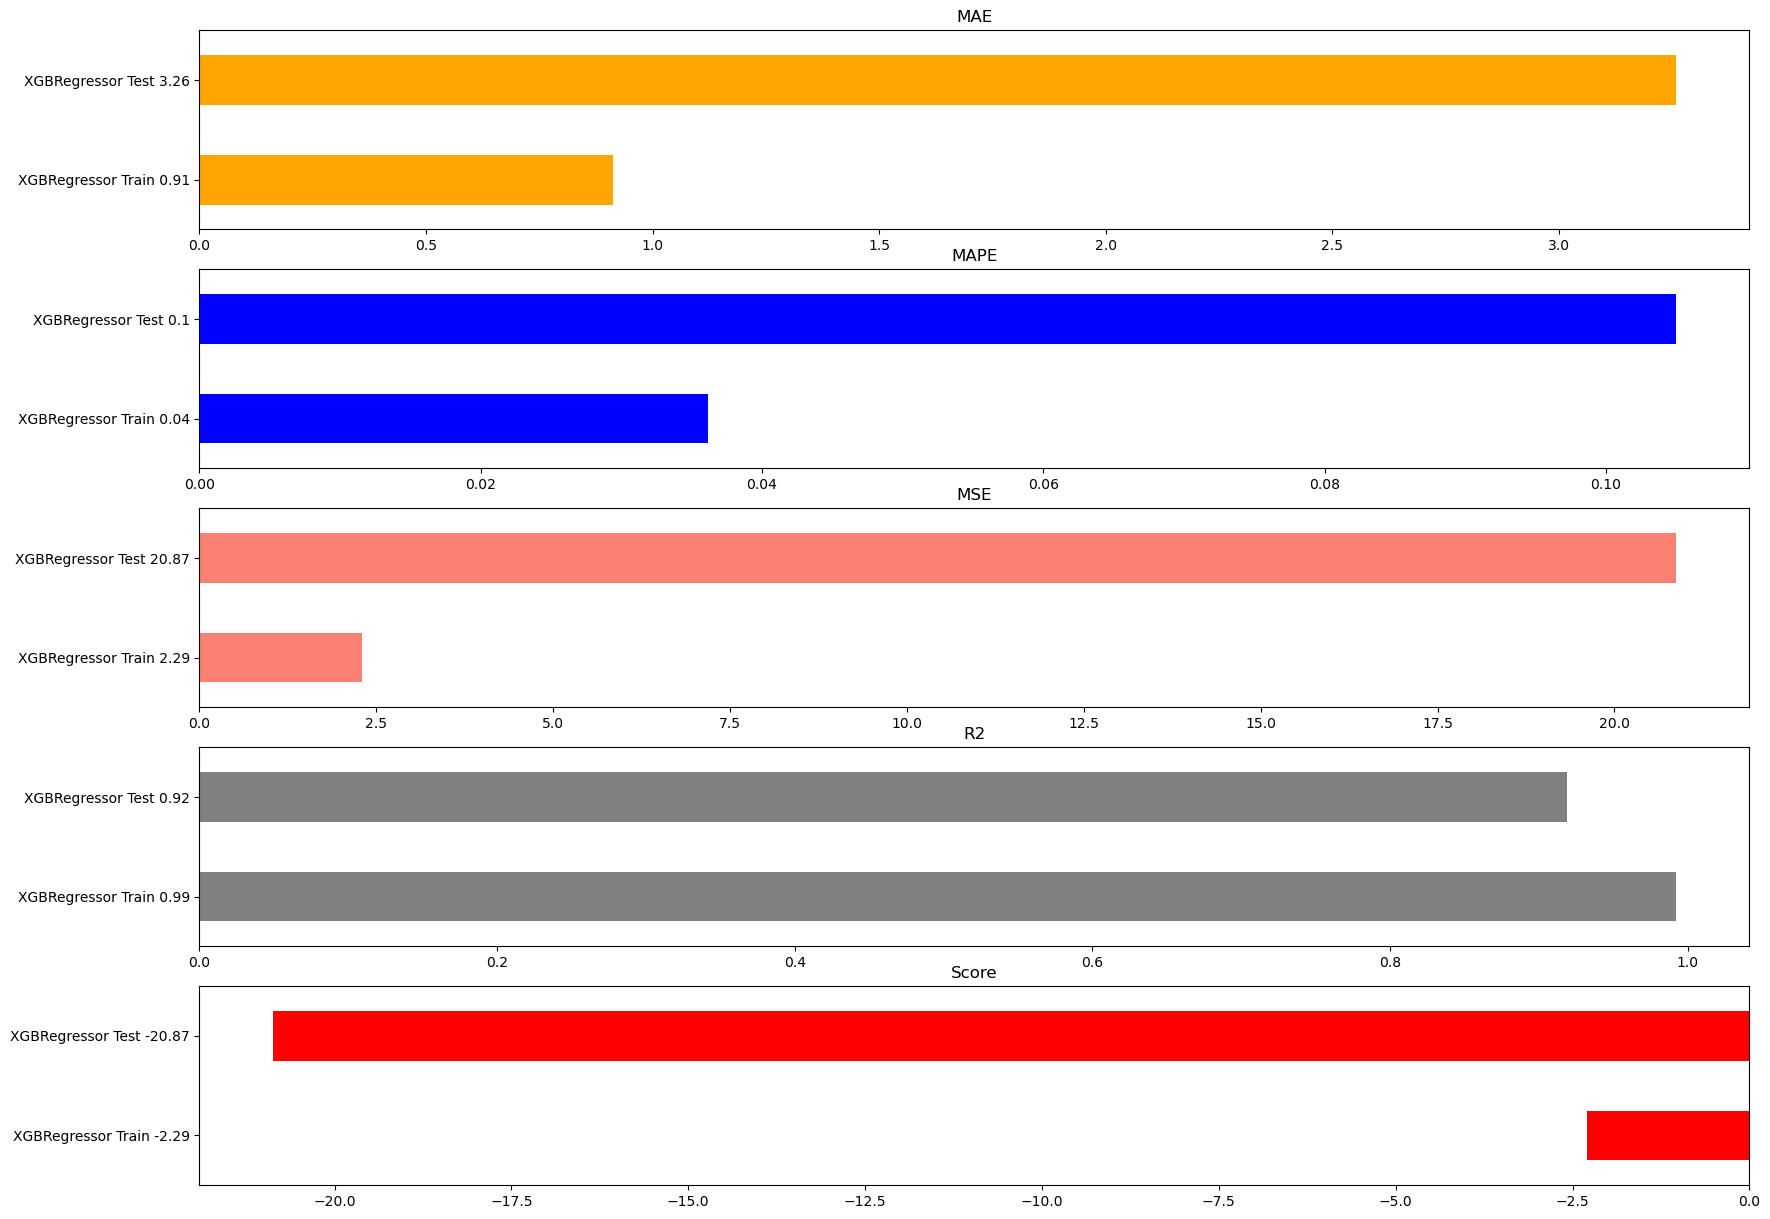

In [353]:
np.random.seed(6)

try_it(xgb_model,"XGBRegressor",xgb_grid,sc='neg_mean_squared_error',itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__colsample_bytree=0.4, model__gamma=0.5555555555555556, model__learning_rate=0.001, model__max_depth=4, model__n_estimators=250, model__reg_alpha=0.0001, model__reg_lambda=0.001, model__subsample=0.9, pf_trans__pf__degree=2;, score=-26.617 total time=   0.2s

[CV 2/5] END model__colsample_bytree=0.4, model__gamma=0.5555555555555556, model__learning_rate=0.001, model__max_depth=4, model__n_estimators=250, model__reg_alpha=0.0001, model__reg_lambda=0.001, model__subsample=0.9, pf_trans__pf__degree=2;, score=-28.469 total time=   0.1s

[CV 3/5] END model__colsample_bytree=0.4, model__gamma=0.5555555555555556, model__learning_rate=0.001, model__max_depth=4, model__n_estimators=250, model__reg_alpha=0.0001, model__reg_lambda=0.001, model__subsample=0.9, pf_trans__pf__degree=2;, score=-27.349 total time=   0.1s

[CV 4/5] END model__colsample_bytree=0.4, model__gamma=0.5555555555555556, model__learning_rate=0.00

,MAE,MAPE,MSE,R2,Score
XGBRegressor Train,0.336429,0.012519,0.890520,0.996865,-0.336429
XGBRegressor Test,3.807801,0.120321,31.850716,0.876395,-3.807801


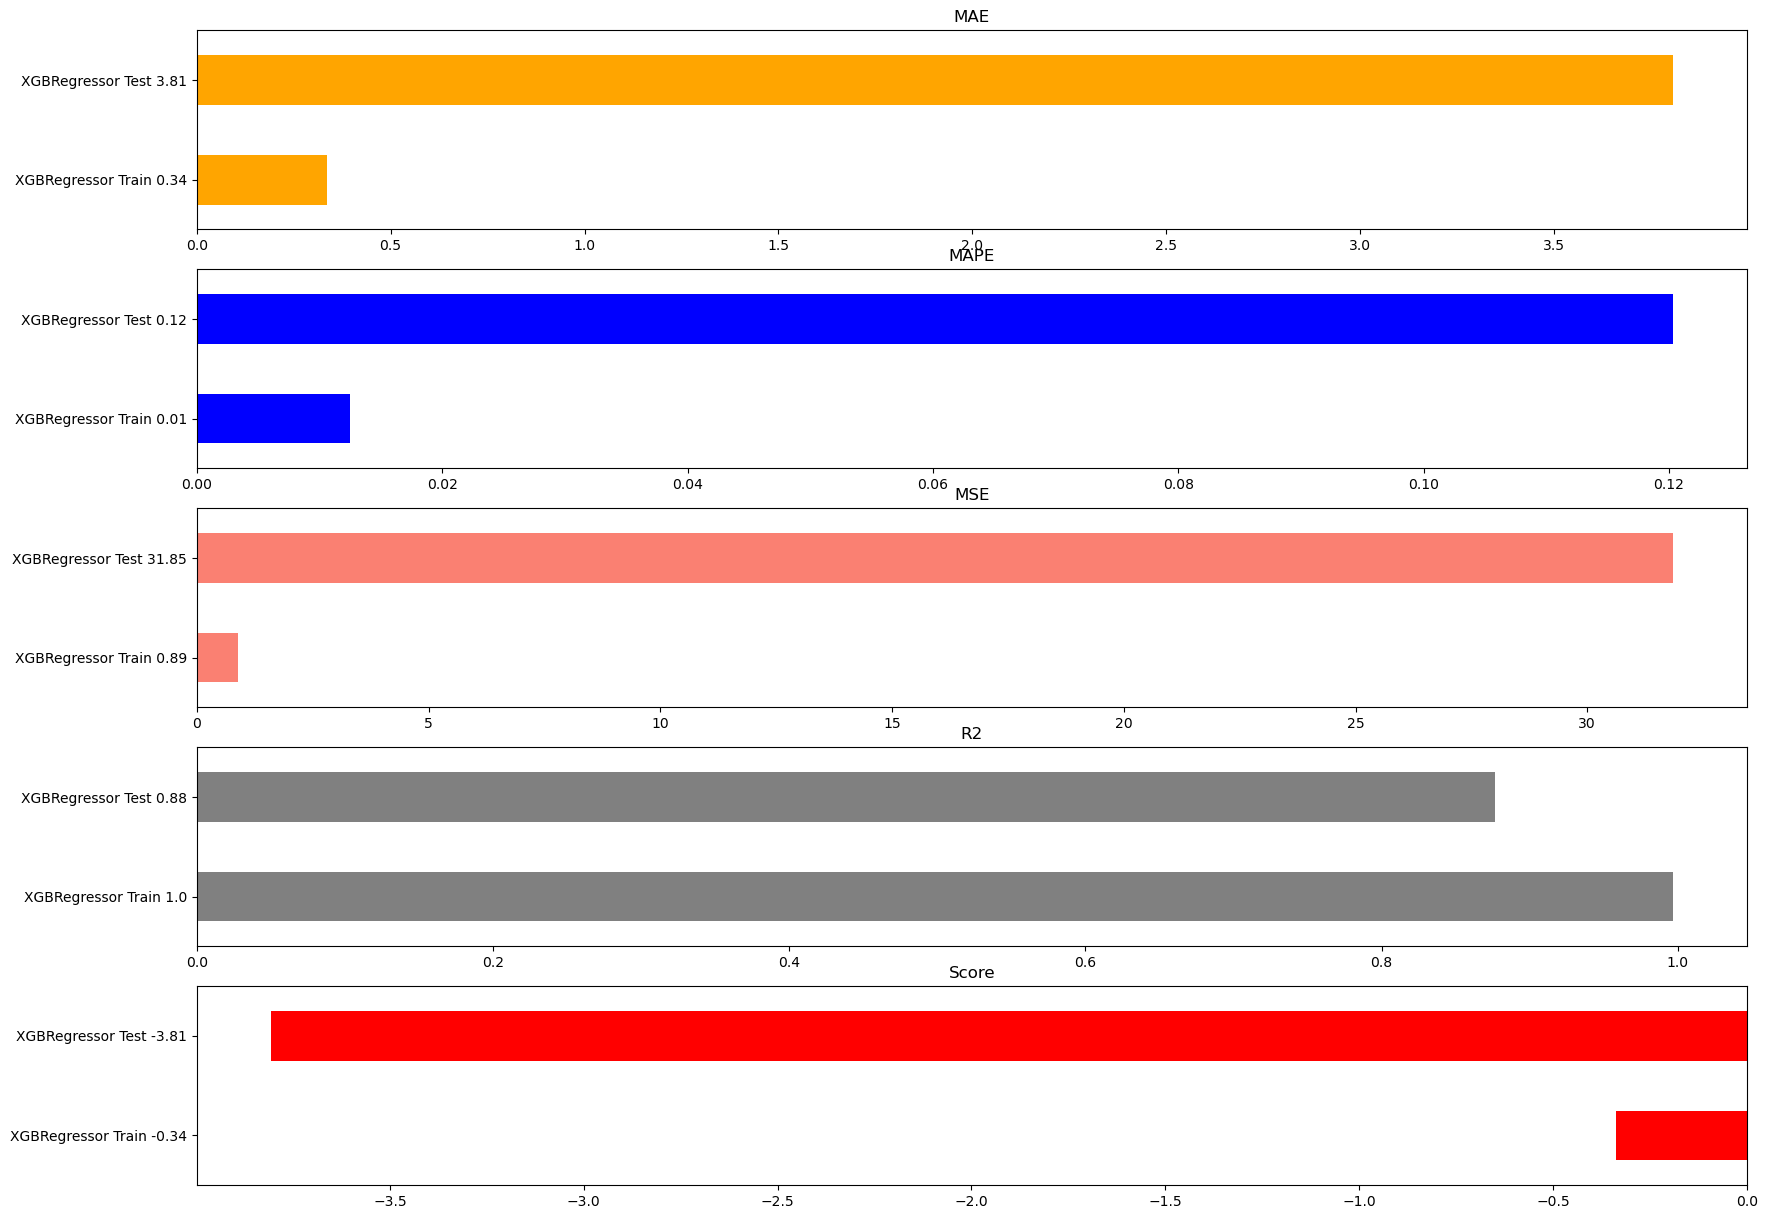

In [355]:
np.random.seed(0)

try_it(xgb_model,"XGBRegressor",xgb_grid,sc='neg_mean_absolute_error',itr=20,ver=4)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

[CV 1/5] END model__colsample_bytree=0.3, model__gamma=0.333, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=250, model__reg_alpha=0.001, model__reg_lambda=0.0001, model__subsample=0.6, pf_trans__pf__degree=2;, score=0.866 total time=   0.2s

[CV 2/5] END model__colsample_bytree=0.3, model__gamma=0.333, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=250, model__reg_alpha=0.001, model__reg_lambda=0.0001, model__subsample=0.6, pf_trans__pf__degree=2;, score=0.871 total time=   0.1s

[CV 3/5] END model__colsample_bytree=0.3, model__gamma=0.333, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=250, model__reg_alpha=0.001, model__reg_lambda=0.0001, model__subsample=0.6, pf_trans__pf__degree=2;, score=0.902 total time=   0.1s

[CV 4/5] END model__colsample_bytree=0.3, model__gamma=0.333, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=250, model__reg_alpha=0.00

,MAE,MAPE,MSE,R2,Score
XGBRegressor Train,0.930885,0.036948,2.298471,0.991909,0.991909
XGBRegressor Test,3.197253,0.100880,21.008705,0.918470,0.918470


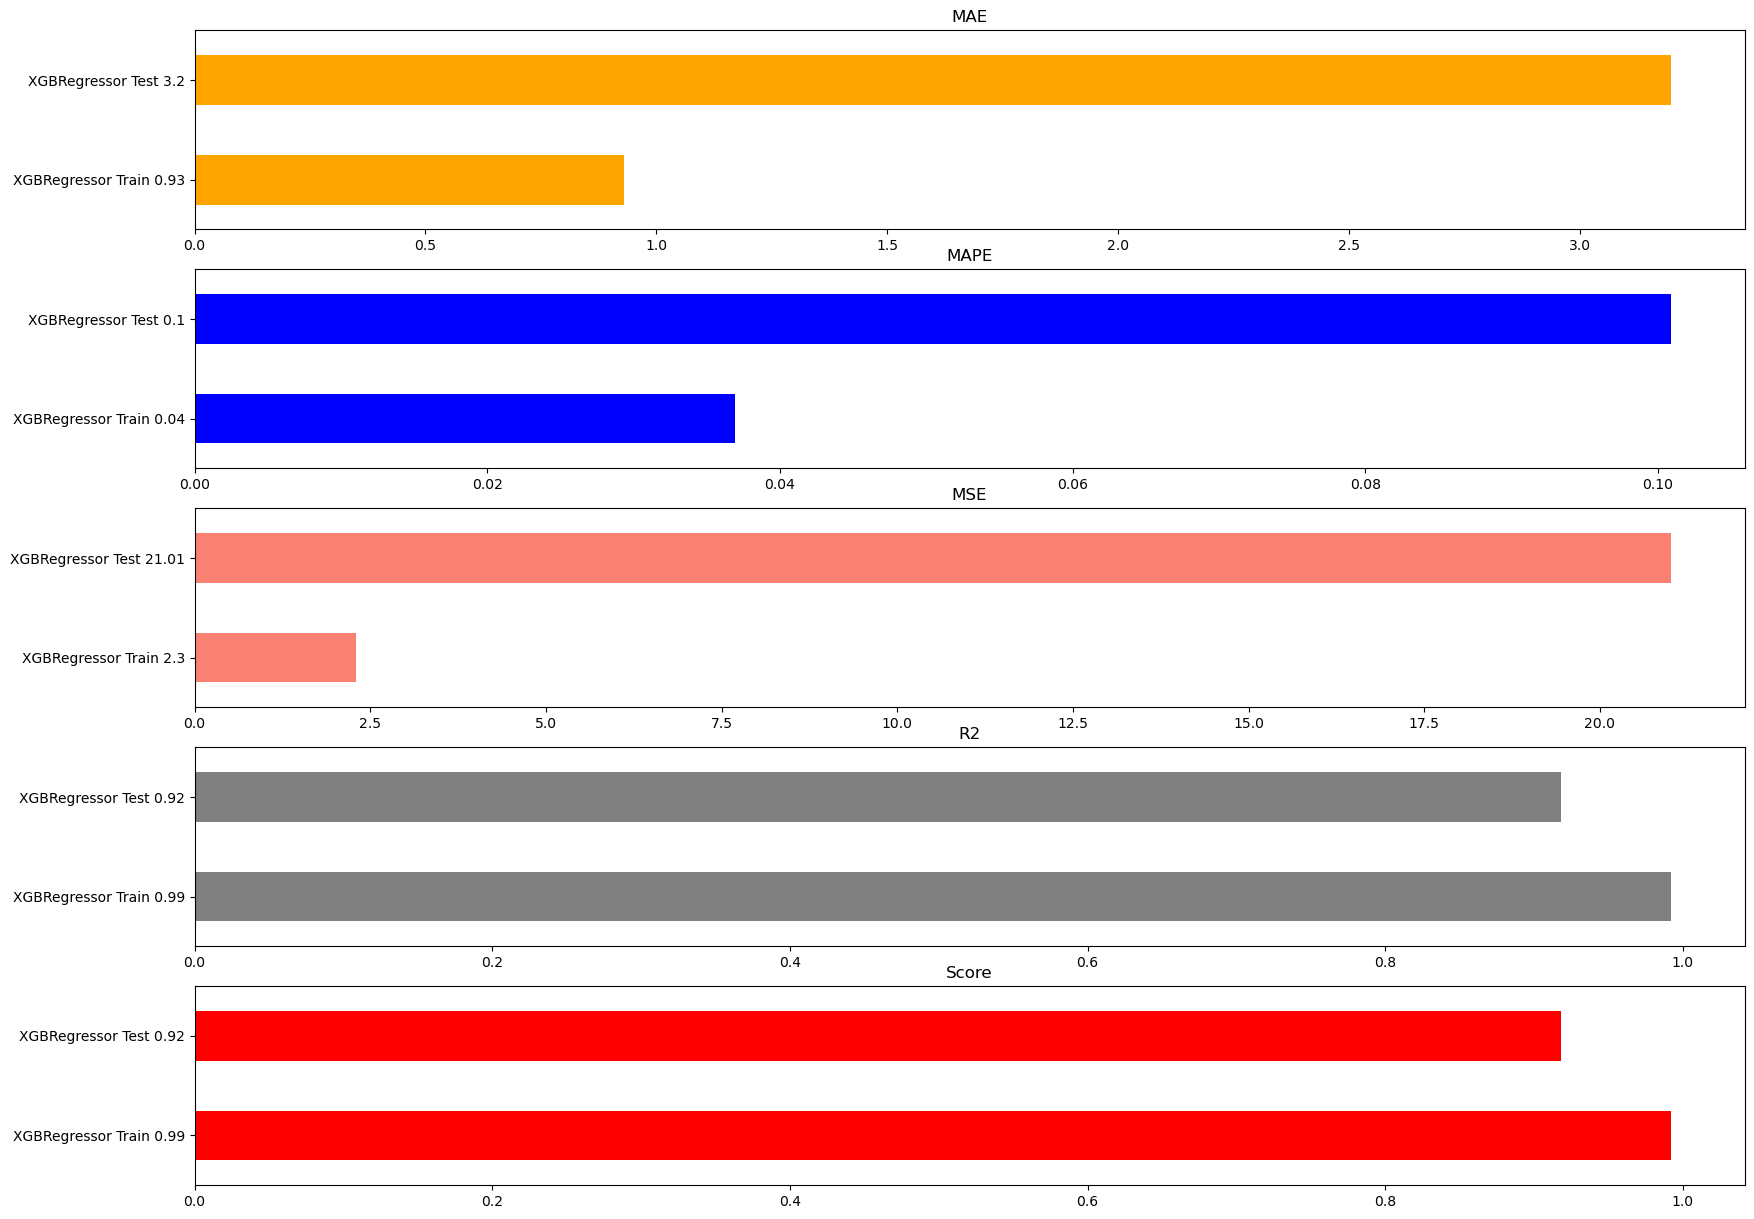

In [420]:
np.random.seed(42)

xgb_grid = {"pf_trans__pf__degree":[2],
            'model__n_estimators': [250],
            'model__learning_rate': [0.1],
            'model__max_depth': [5],
            'model__subsample': [0.6],
            'model__colsample_bytree': [0.3],
            'model__gamma': [0.333],
            'model__reg_alpha': [0.001],
            'model__reg_lambda': [0.0001]}

xgb_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",XGBRegressor())])

final(xgb_model,"XGBRegressor",xgb_grid,sc='r2',ver=4)

### Ridge

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model=Lasso(), model__alpha=20.327, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=0.002 total time=   0.0s

[CV 2/5] END model=Lasso(), model__alpha=20.327, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=0.007 total time=   0.0s

[CV 3/5] END model=Lasso(), model__alpha=20.327, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=0.013 total time=   0.0s

[CV 4/5] END model=Lasso(), model__alpha=20.327, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=0.008 total time=   0.0s

[CV 5/5] END model=Lasso(), model__alpha=20.327, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=0.005 total time=   0.0s

[CV 1/5] END model=Lasso(), model__alpha=21.989, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.005 total time=   0.1s

[CV 2/5] END model=Lasso(), model__alpha=21.989, pf_tra

,MAE,MAPE,MSE,R2,Score
Ridge Train,2.591897,0.094724,12.700222,0.955294,0.955294
Ridge Test,4.119115,0.134648,36.438876,0.858589,0.858589


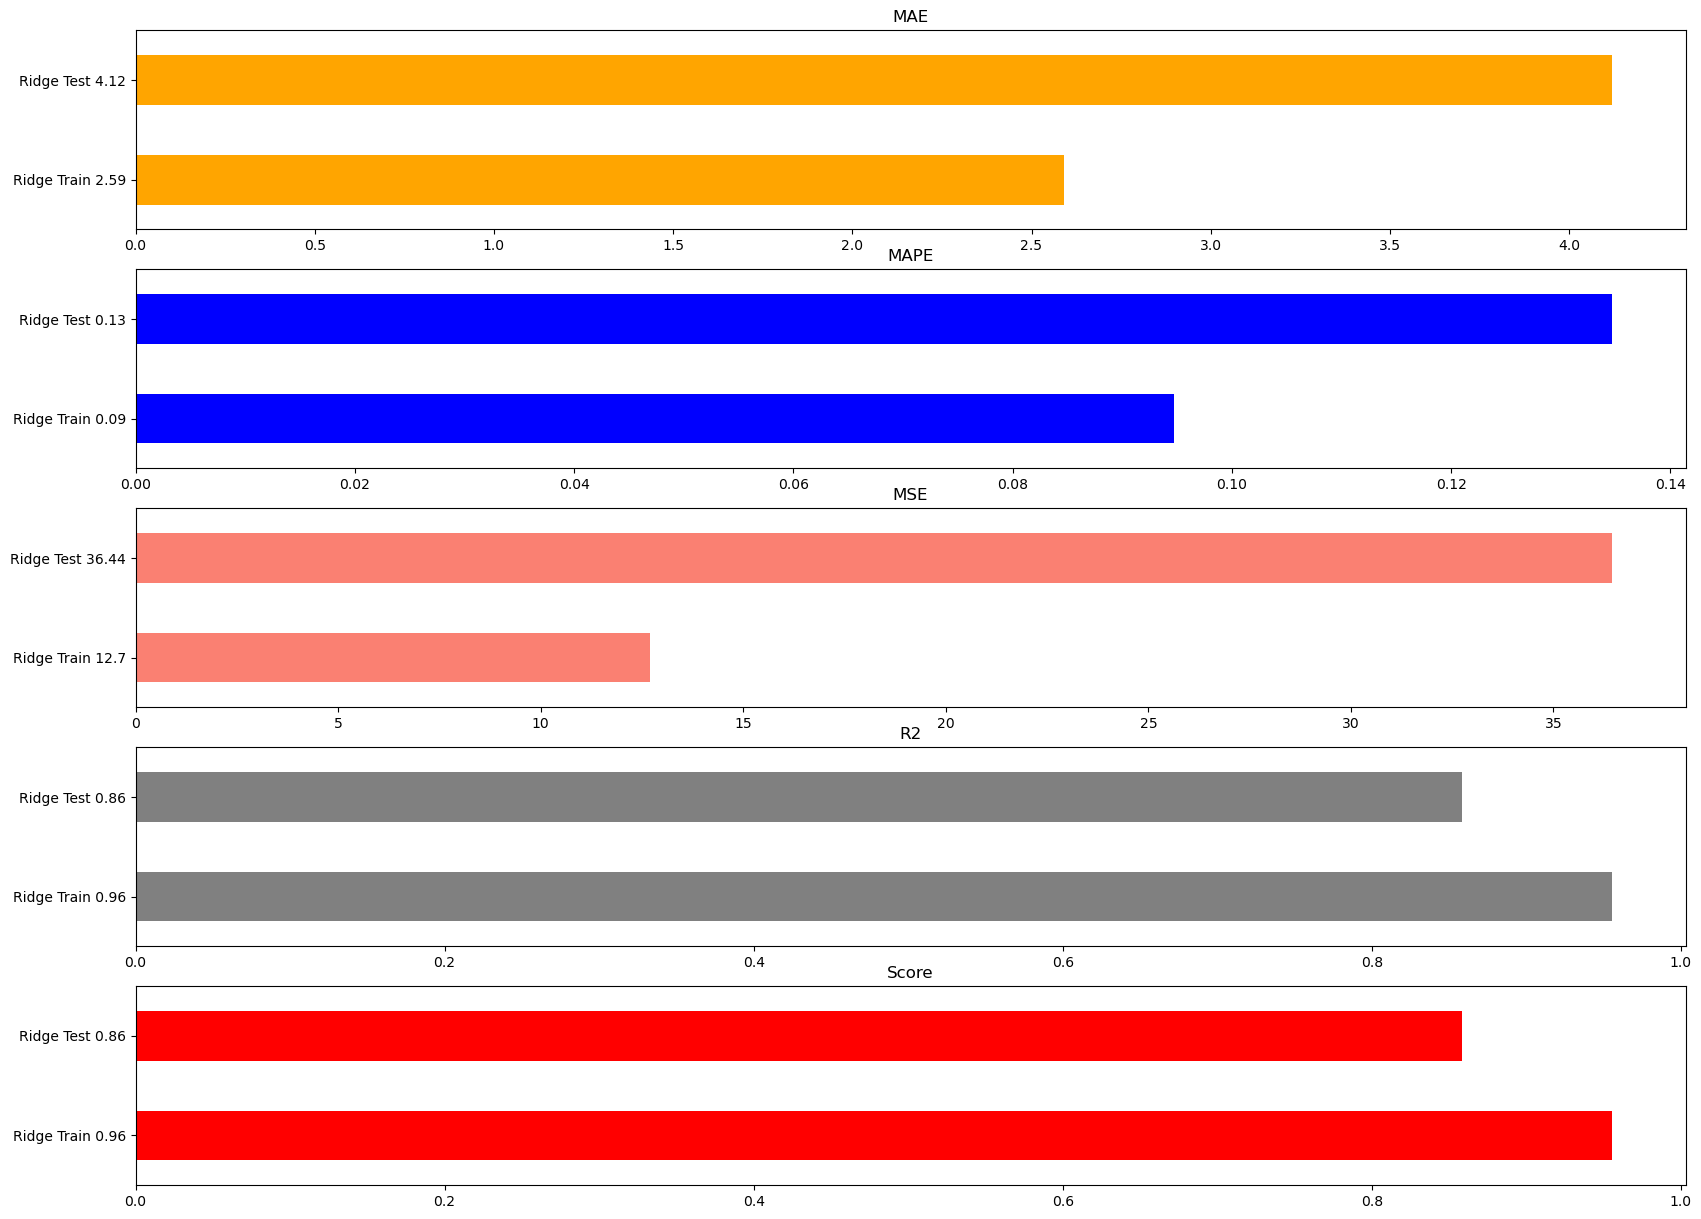

In [370]:
np.random.seed(42)
r_grid={"model":[Lasso(),Ridge()],
       "model__alpha":np.arange(0.001,50,0.001),
       'preprocessor__lab_trans__ohe__drop':[None,'first'],
       "pf_trans__pf__degree":np.asarray([2,3,4])}

rg_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",Ridge(max_iter=99999999))])
try_it(rg_model,"Ridge",r_grid,itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model=Lasso(), model__alpha=27.117, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-320.834 total time=   0.0s

[CV 2/5] END model=Lasso(), model__alpha=27.117, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-301.756 total time=   0.0s

[CV 3/5] END model=Lasso(), model__alpha=27.117, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-297.514 total time=   0.0s

[CV 4/5] END model=Lasso(), model__alpha=27.117, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-263.508 total time=   0.0s

[CV 5/5] END model=Lasso(), model__alpha=27.117, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-238.027 total time=   0.0s

[CV 1/5] END model=Lasso(), model__alpha=32.659, pf_trans__pf__degree=2, preprocessor__lab_trans__ohe__drop=first;, score=-320.834 total time=   0.0s

[CV 2/5] END model=Lasso(), model__a

,MAE,MAPE,MSE,R2,Score
Ridge Train,2.877351,0.104859,14.719922,0.948184,-14.719922
Ridge Test,4.234969,0.141192,34.206040,0.867254,-34.206040


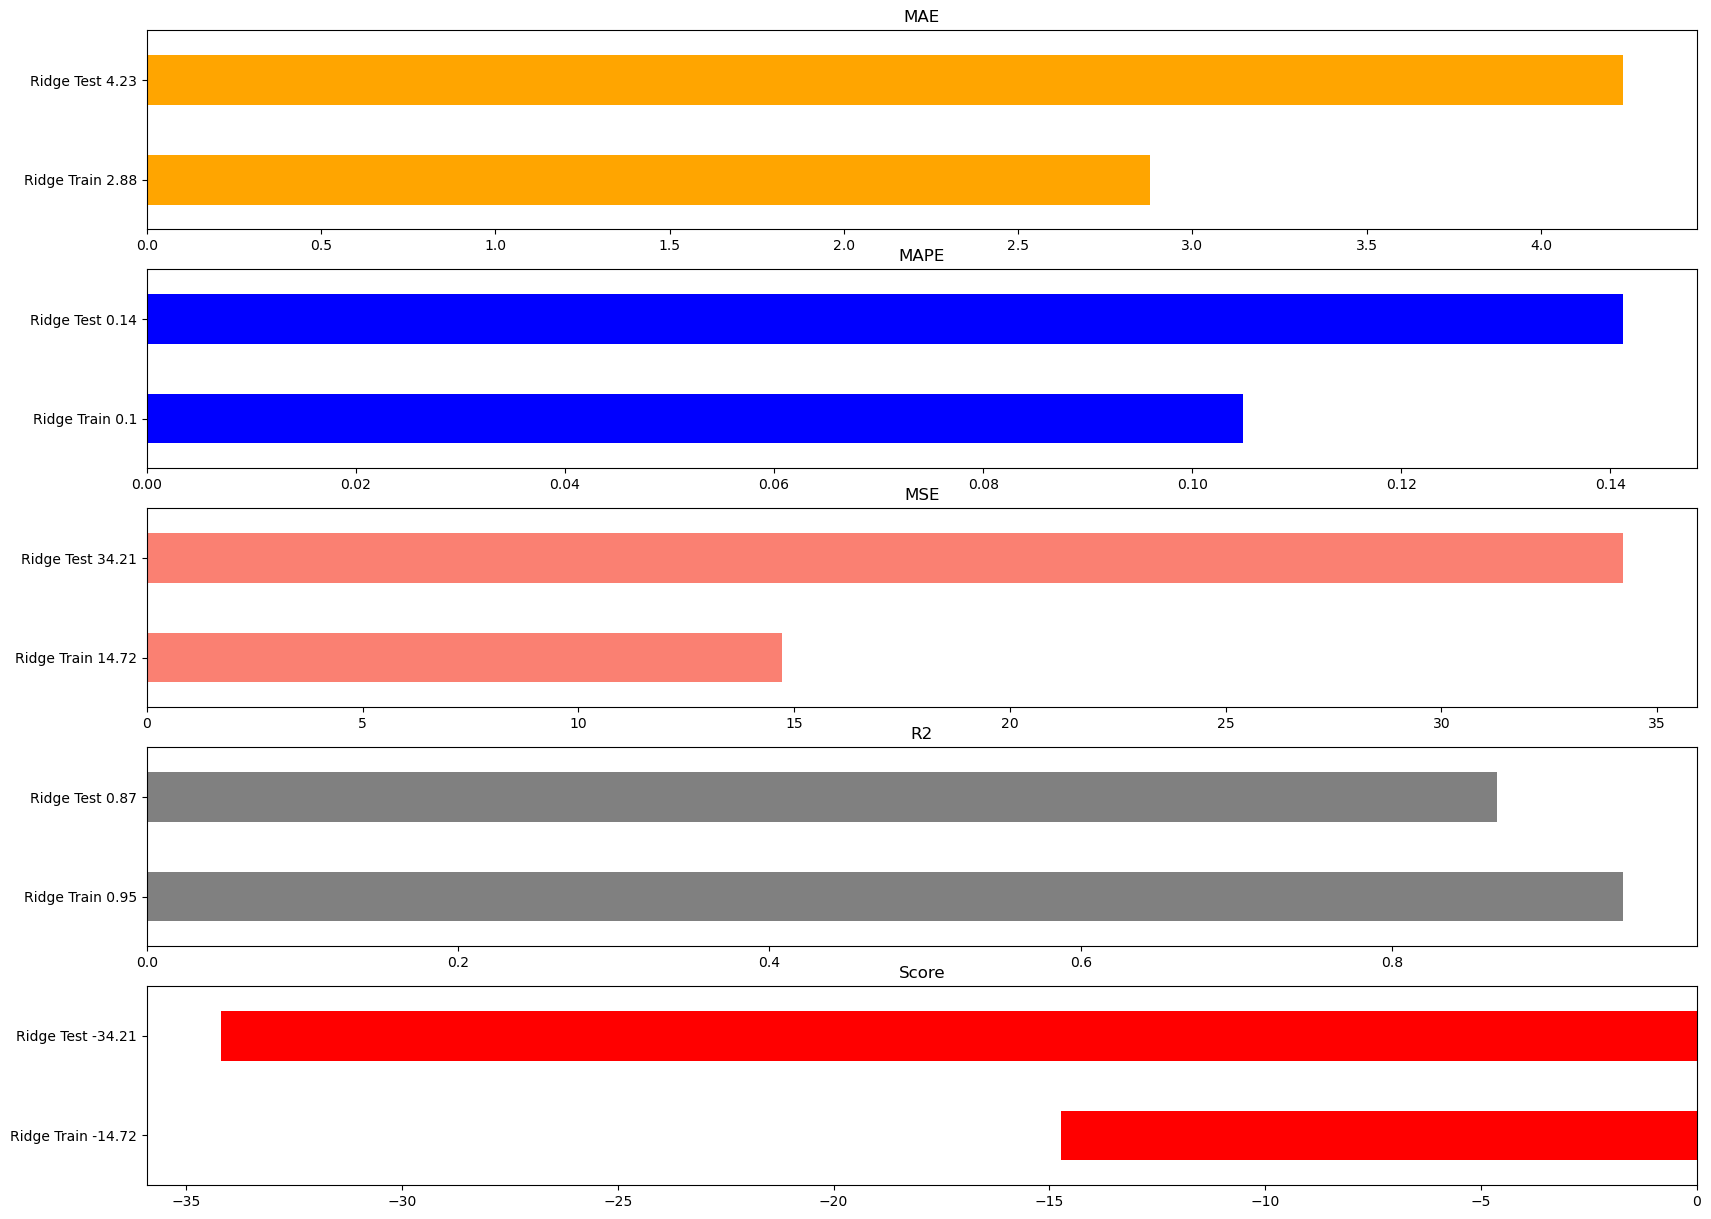

In [371]:
np.random.seed(6)

try_it(rg_model,"Ridge",r_grid,sc='neg_mean_squared_error',itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model=Ridge(alpha=15.442), model__alpha=0.9530000000000001, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=first;, score=-6.423 total time=   0.0s

[CV 2/5] END model=Ridge(alpha=15.442), model__alpha=0.9530000000000001, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=first;, score=-9.699 total time=   0.1s

[CV 3/5] END model=Ridge(alpha=15.442), model__alpha=0.9530000000000001, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=first;, score=-6.681 total time=   0.0s

[CV 4/5] END model=Ridge(alpha=15.442), model__alpha=0.9530000000000001, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=first;, score=-5.431 total time=   0.0s

[CV 5/5] END model=Ridge(alpha=15.442), model__alpha=0.9530000000000001, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=first;, score=-5.157 total time=   0.0s

[CV 1/5] END model=Ridge(alpha=15.442), model__alpha=22.64, pf_trans__pf

,MAE,MAPE,MSE,R2,Score
Ridge Train,2.802014,0.101739,14.087070,0.950412,-2.802014
Ridge Test,4.190179,0.139293,34.330826,0.866770,-4.190179


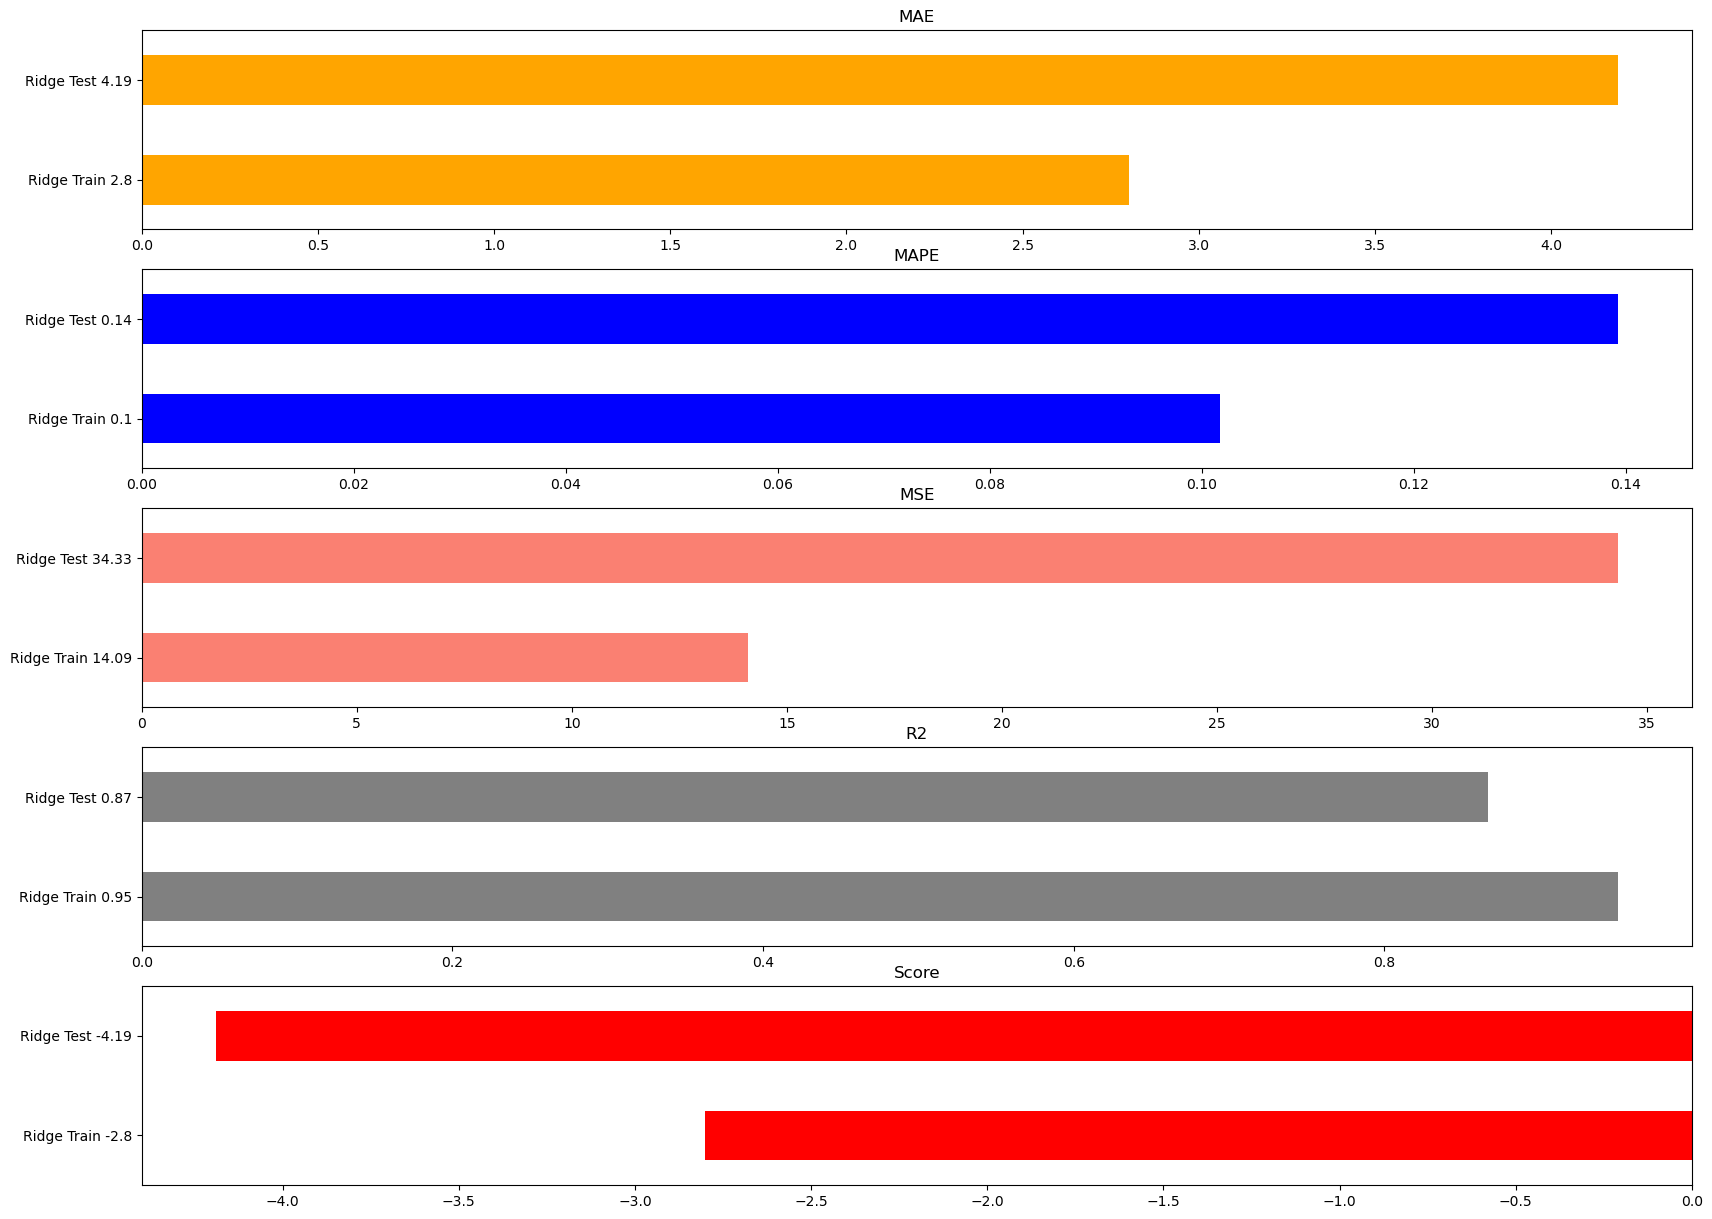

In [372]:
np.random.seed(0)

try_it(rg_model,"Ridge",r_grid,sc='neg_mean_absolute_error',itr=20,ver=4)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

[CV 1/5] END model__alpha=0.01, pf_trans__pf__degree=2, preprocessor__lab_trans__ohe__drop=None;, score=0.870 total time=   0.0s

[CV 2/5] END model__alpha=0.01, pf_trans__pf__degree=2, preprocessor__lab_trans__ohe__drop=None;, score=0.829 total time=   0.0s

[CV 3/5] END model__alpha=0.01, pf_trans__pf__degree=2, preprocessor__lab_trans__ohe__drop=None;, score=0.877 total time=   0.0s

[CV 4/5] END model__alpha=0.01, pf_trans__pf__degree=2, preprocessor__lab_trans__ohe__drop=None;, score=0.843 total time=   0.0s

[CV 5/5] END model__alpha=0.01, pf_trans__pf__degree=2, preprocessor__lab_trans__ohe__drop=None;, score=0.855 total time=   0.0s

Ridge

{'model__alpha': 0.01, 'pf_trans__pf__degree': 2, 'preprocessor__lab_trans__ohe__drop': None} 

 0.855


,MAE,MAPE,MSE,R2,Score
Ridge Train,3.695587,0.123775,25.123746,0.911562,0.911562
Ridge Test,4.063042,0.128036,28.313394,0.890122,0.890122


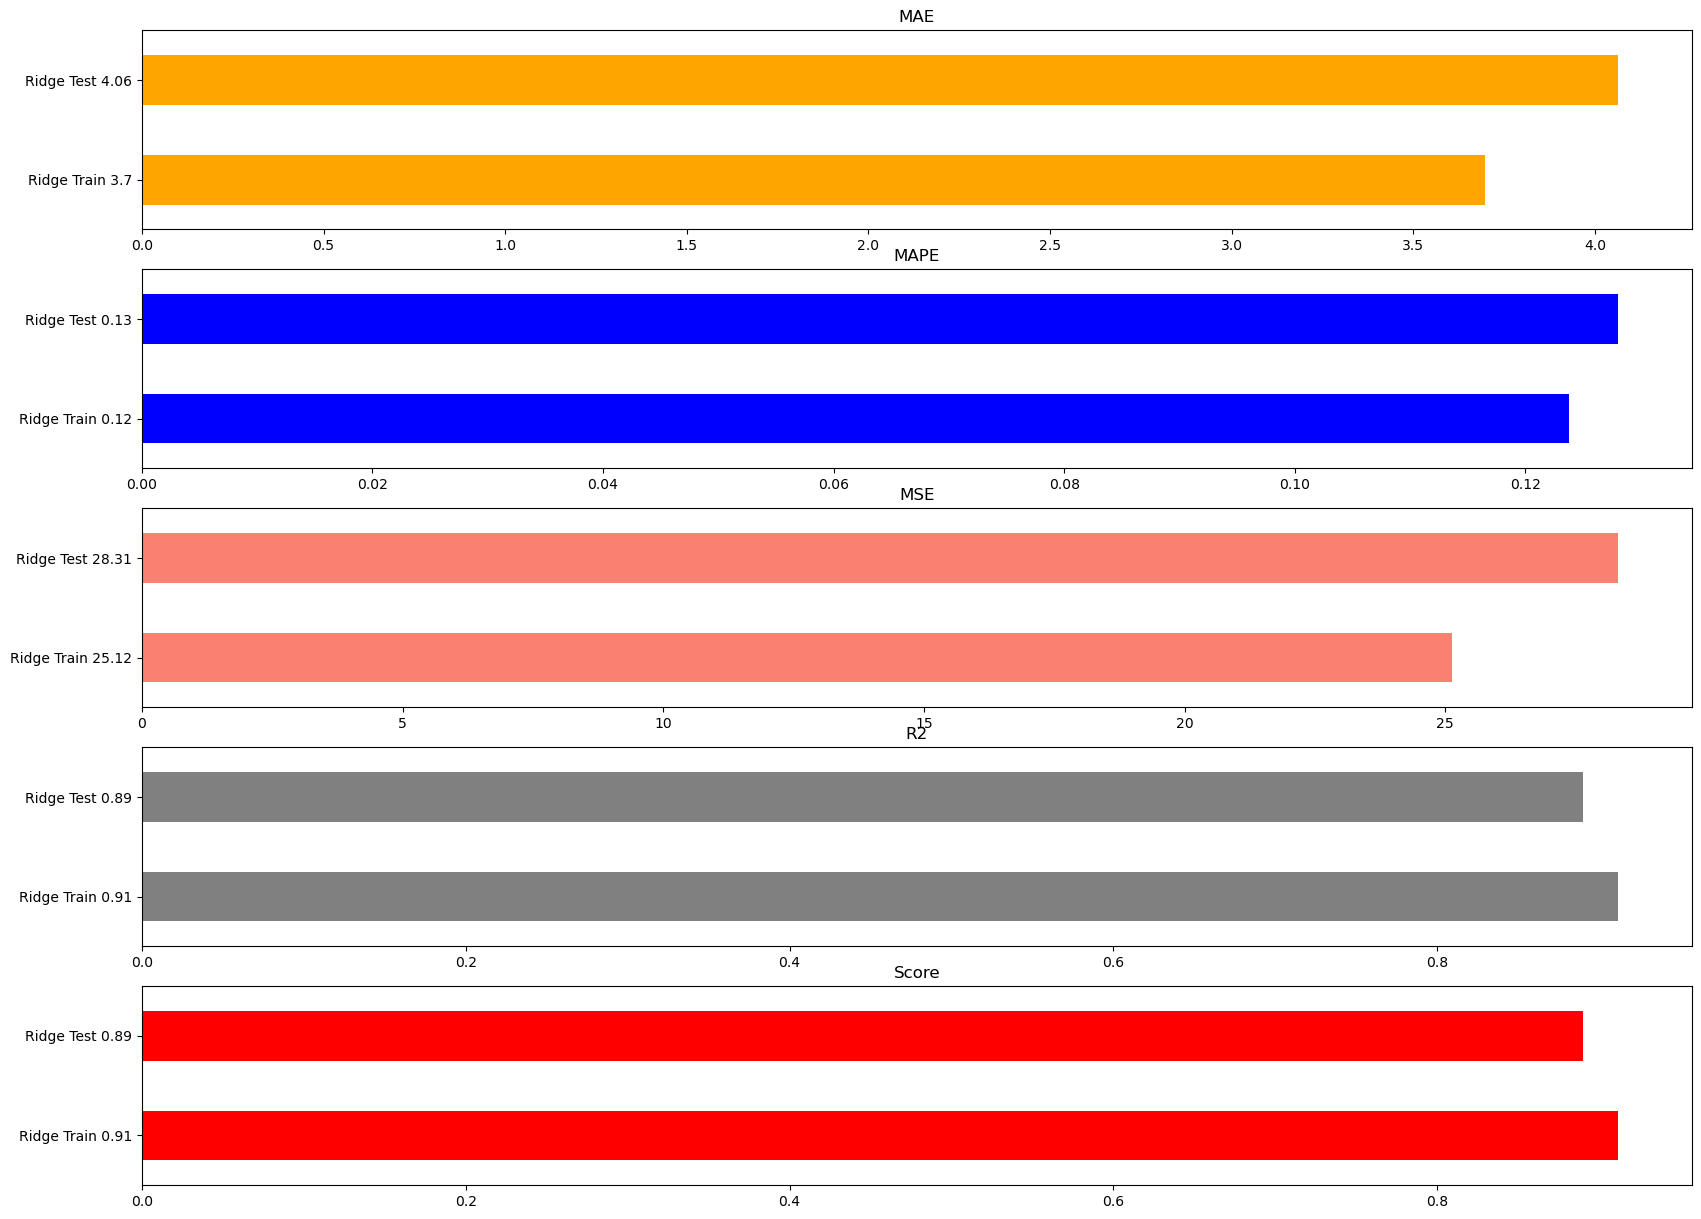

In [443]:
r_grid={"model__alpha":[0.01],
       'preprocessor__lab_trans__ohe__drop':[None],
       "pf_trans__pf__degree":[2]}

rg_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",Ridge(max_iter=99999999))])
final(rg_model,"Ridge",r_grid,ver=4)

### RandomForestRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__max_depth=12, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=400, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.766 total time=   2.6s

[CV 2/5] END model__max_depth=12, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=400, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.818 total time=   2.6s

[CV 3/5] END model__max_depth=12, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=400, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.846 total time=   2.6s

[CV 4/5] END model__max_depth=12, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=400, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.815 t

,MAE,MAPE,MSE,R2,Score
RandomForestRegressor Train,1.621967,0.058373,5.858035,0.979379,0.979379
RandomForestRegressor Test,4.344656,0.138672,34.440729,0.866344,0.866344


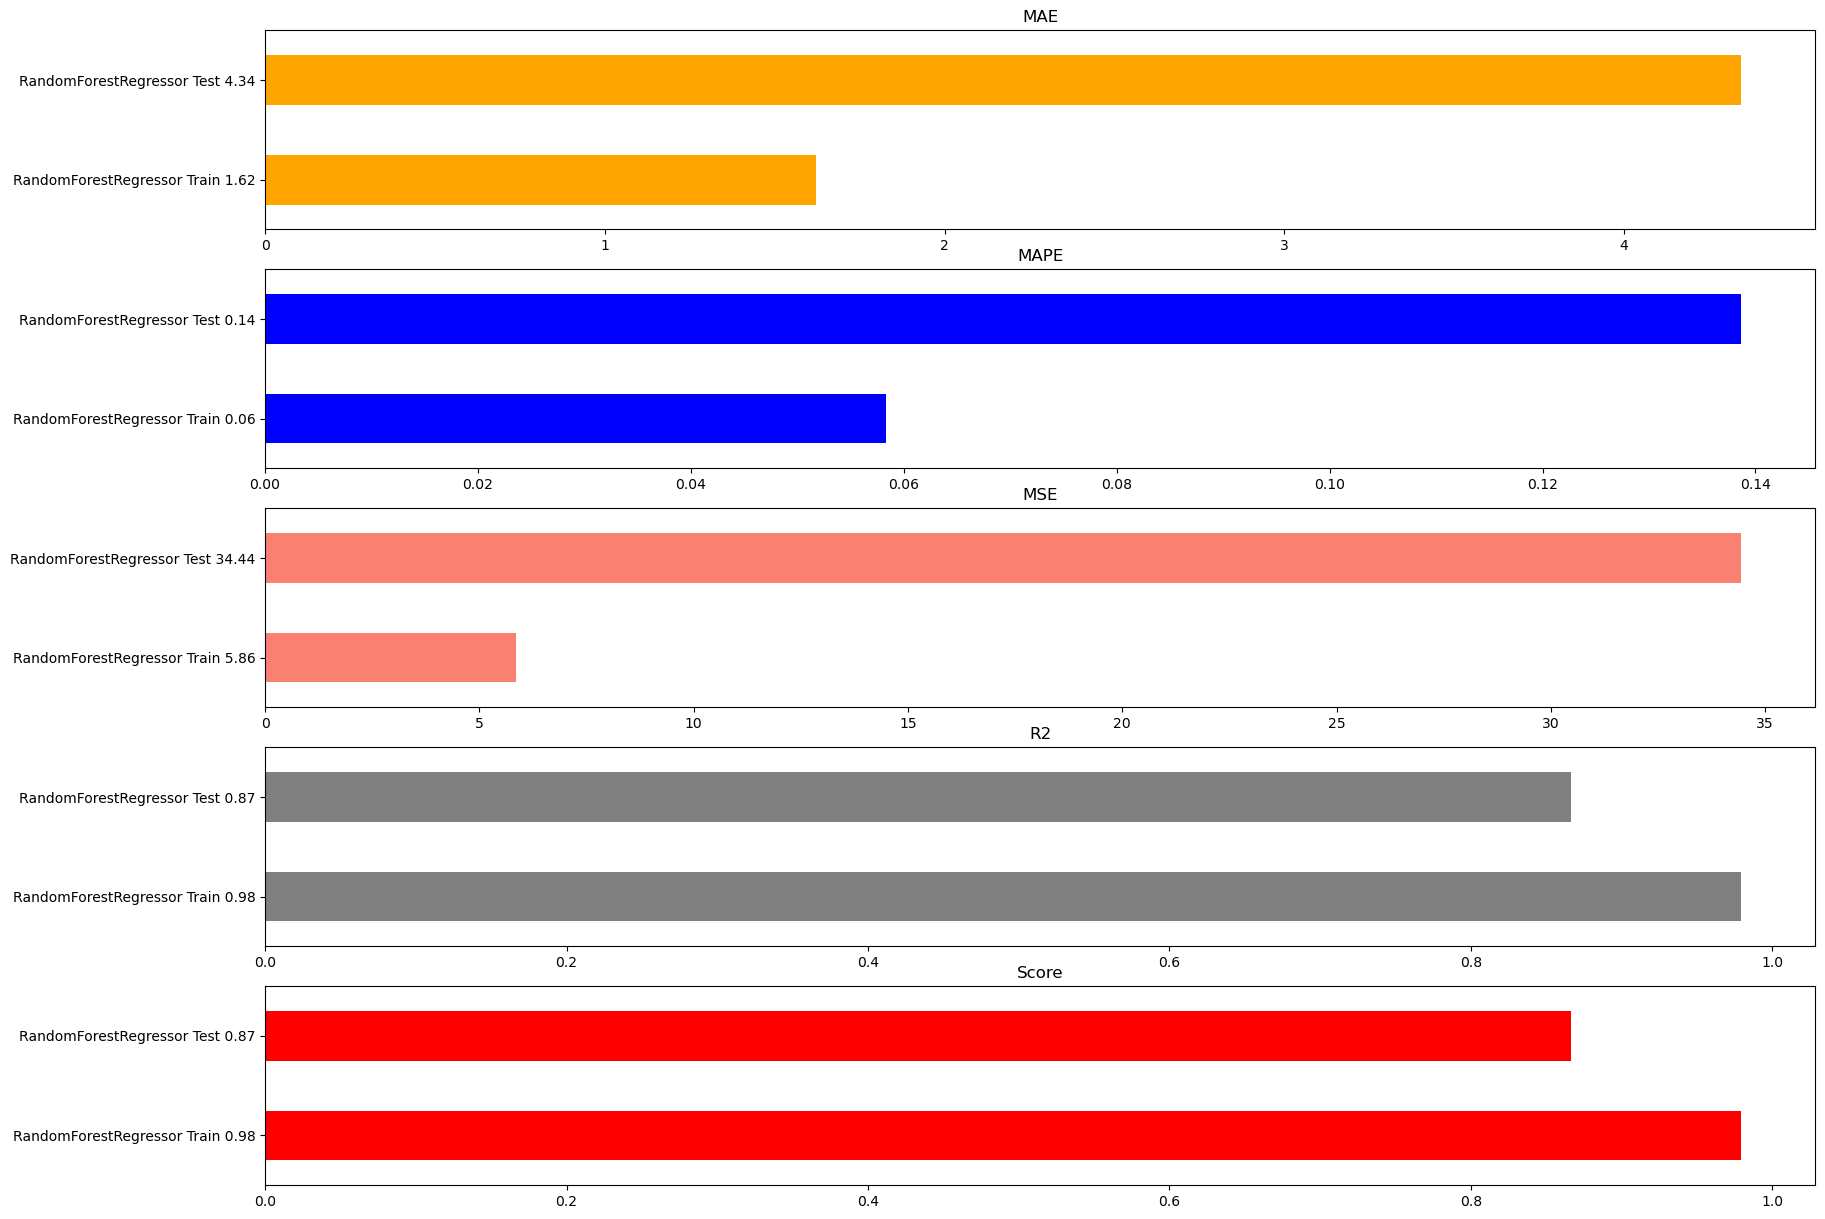

In [374]:
np.random.seed(42)

rfr_grid={'model__n_estimators': np.arange(10, 700, 10),
          'model__max_depth': np.arange(1, 20),
          'model__min_samples_split': np.arange(2, 20),
          'model__min_samples_leaf': np.arange(1, 20),
          'model__max_features': ['auto', 'sqrt', 'log2'],
          'preprocessor__lab_trans__ohe__drop':[None,'first'],
          "pf_trans__pf__degree":np.asarray([2,3,4,5])}

rfr_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",RandomForestRegressor(n_jobs=6))])

try_it(rfr_model,"RandomForestRegressor",rfr_grid,itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__max_depth=17, model__max_features=log2, model__min_samples_leaf=17, model__min_samples_split=5, model__n_estimators=70, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-219.602 total time=   5.9s

[CV 2/5] END model__max_depth=17, model__max_features=log2, model__min_samples_leaf=17, model__min_samples_split=5, model__n_estimators=70, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-197.359 total time=   0.2s

[CV 3/5] END model__max_depth=17, model__max_features=log2, model__min_samples_leaf=17, model__min_samples_split=5, model__n_estimators=70, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-188.863 total time=   0.2s

[CV 4/5] END model__max_depth=17, model__max_features=log2, model__min_samples_leaf=17, model__min_samples_split=5, model__n_estimators=70, pf_trans__pf__degree=3, preprocessor__lab_trans__ohe__drop=None;, score=-1

,MAE,MAPE,MSE,R2,Score
RandomForestRegressor Train,2.558075,0.095155,12.749405,0.955121,-12.749405
RandomForestRegressor Test,4.463894,0.145021,34.833774,0.864818,-34.833774


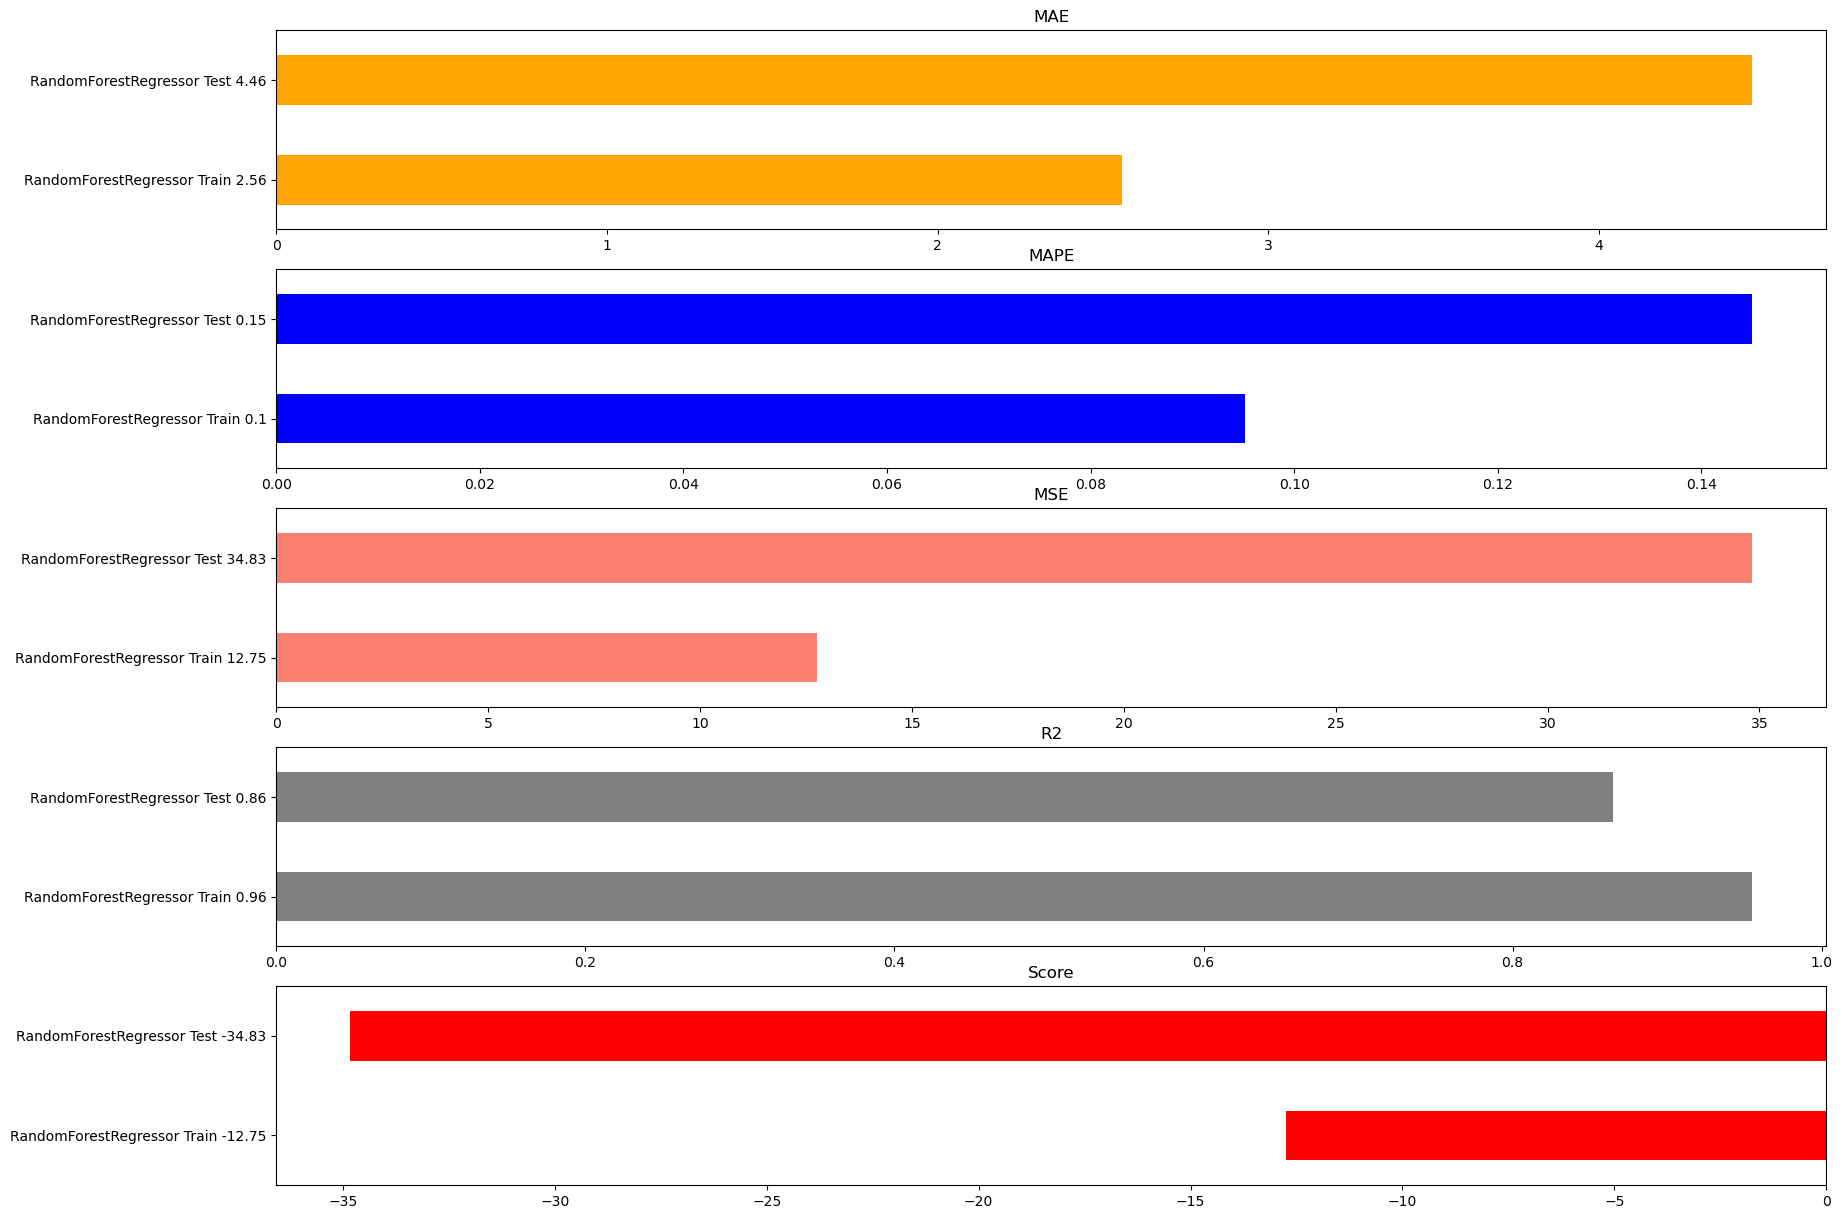

In [378]:
np.random.seed(6)

try_it(rfr_model,"RandomForestRegressor",rfr_grid,sc='neg_mean_squared_error',itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__max_depth=15, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=18, model__n_estimators=680, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=-9.346 total time=   1.0s

[CV 2/5] END model__max_depth=15, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=18, model__n_estimators=680, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=-8.280 total time=   1.0s

[CV 3/5] END model__max_depth=15, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=18, model__n_estimators=680, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=-8.296 total time=   1.1s

[CV 4/5] END model__max_depth=15, model__max_features=log2, model__min_samples_leaf=2, model__min_samples_split=18, model__n_estimators=680, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=-8.3

,MAE,MAPE,MSE,R2,Score
RandomForestRegressor Train,3.496875,0.134648,22.332340,0.921388,-3.496875
RandomForestRegressor Test,4.812715,0.166221,39.091584,0.848295,-4.812715


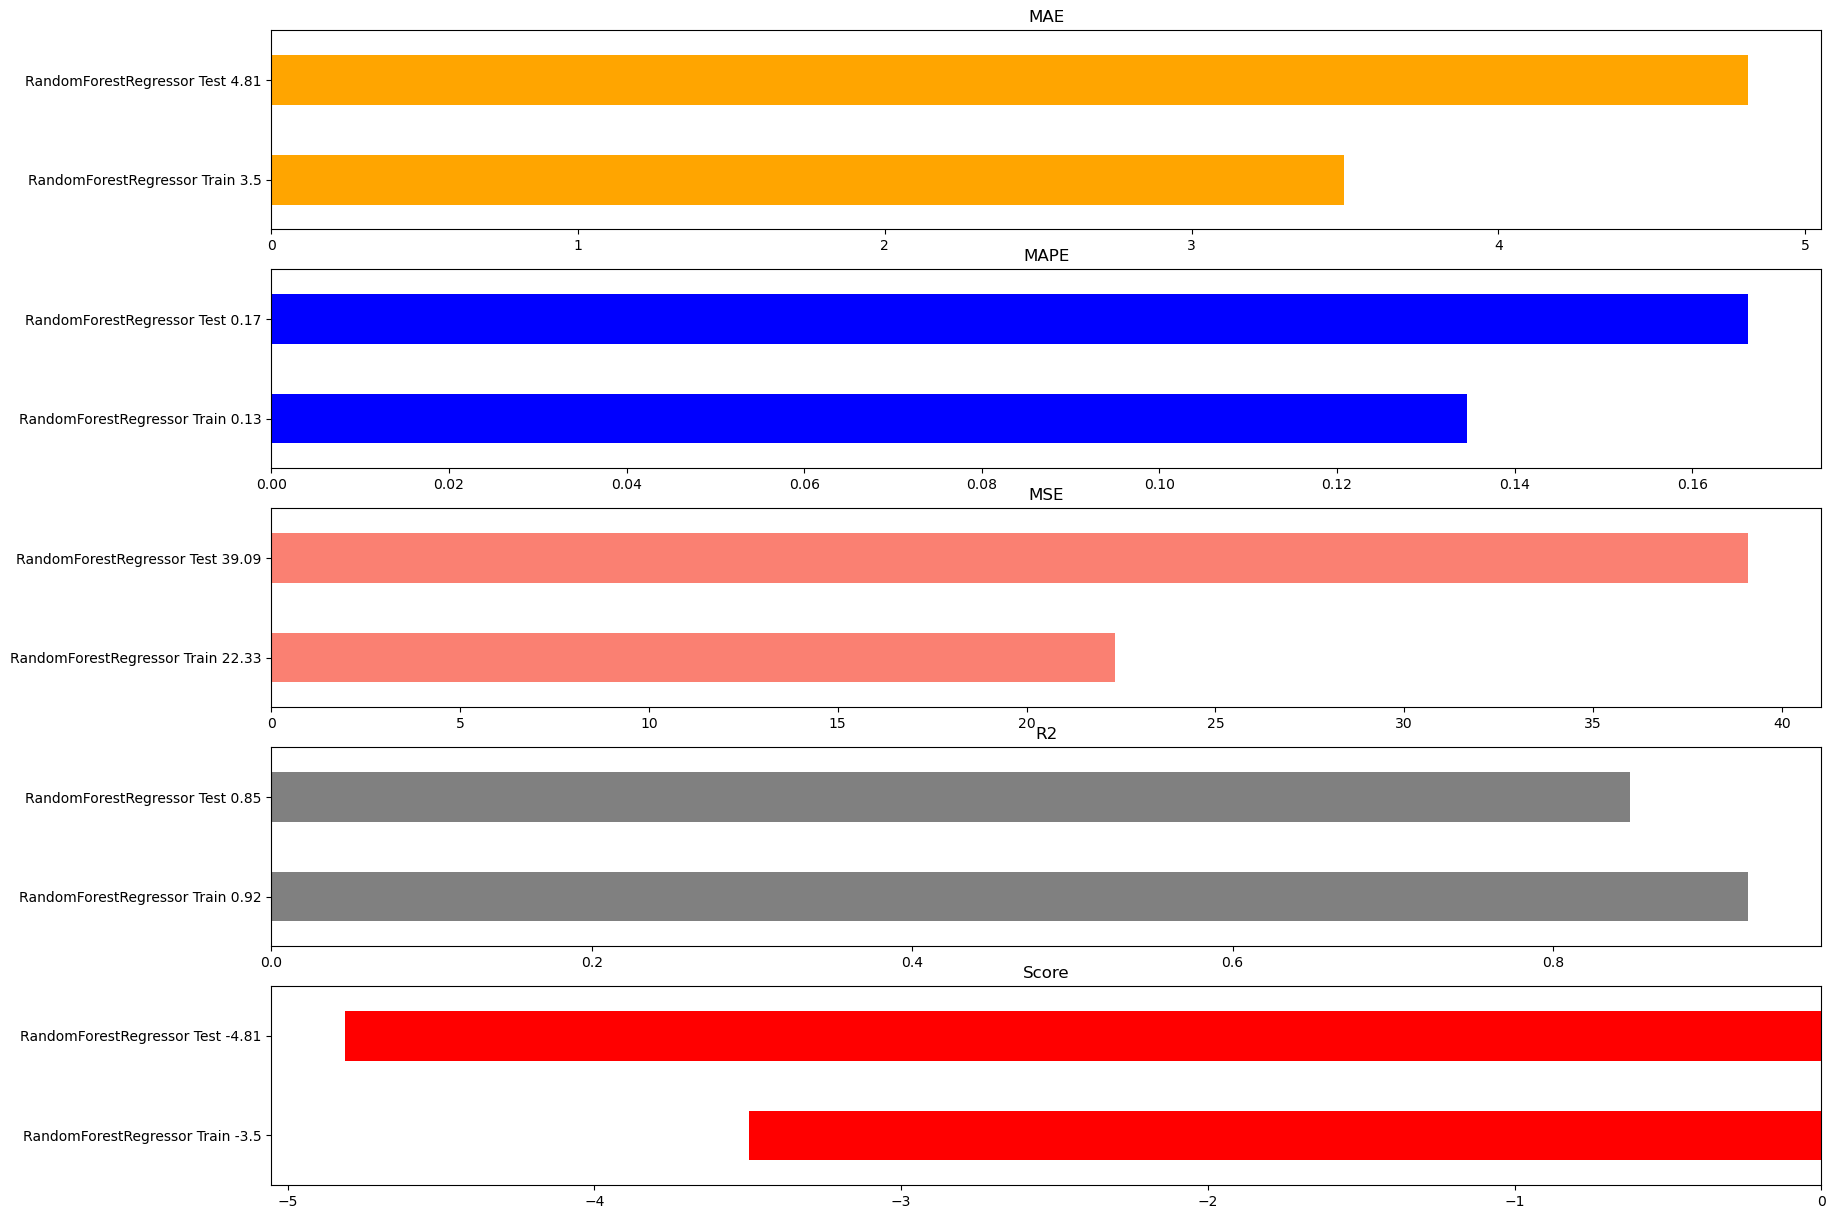

In [379]:
np.random.seed(0)

try_it(rfr_model,"RandomForestRegressor",rfr_grid,sc='neg_mean_absolute_error',itr=20,ver=4)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

[CV 1/5] END model__max_depth=21, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.825 total time=  32.3s

[CV 2/5] END model__max_depth=21, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.821 total time=  26.9s

[CV 3/5] END model__max_depth=21, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.883 total time=  26.4s

[CV 4/5] END model__max_depth=21, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, pf_trans__pf__degree=4, preprocessor__lab_trans__ohe__drop=None;, score=0.878 total ti

,MAE,MAPE,MSE,R2,Score
RandomForestRegressor Train,1.618025,0.058908,5.935681,0.979106,0.979106
RandomForestRegressor Test,4.177372,0.134963,32.673409,0.873202,0.873202


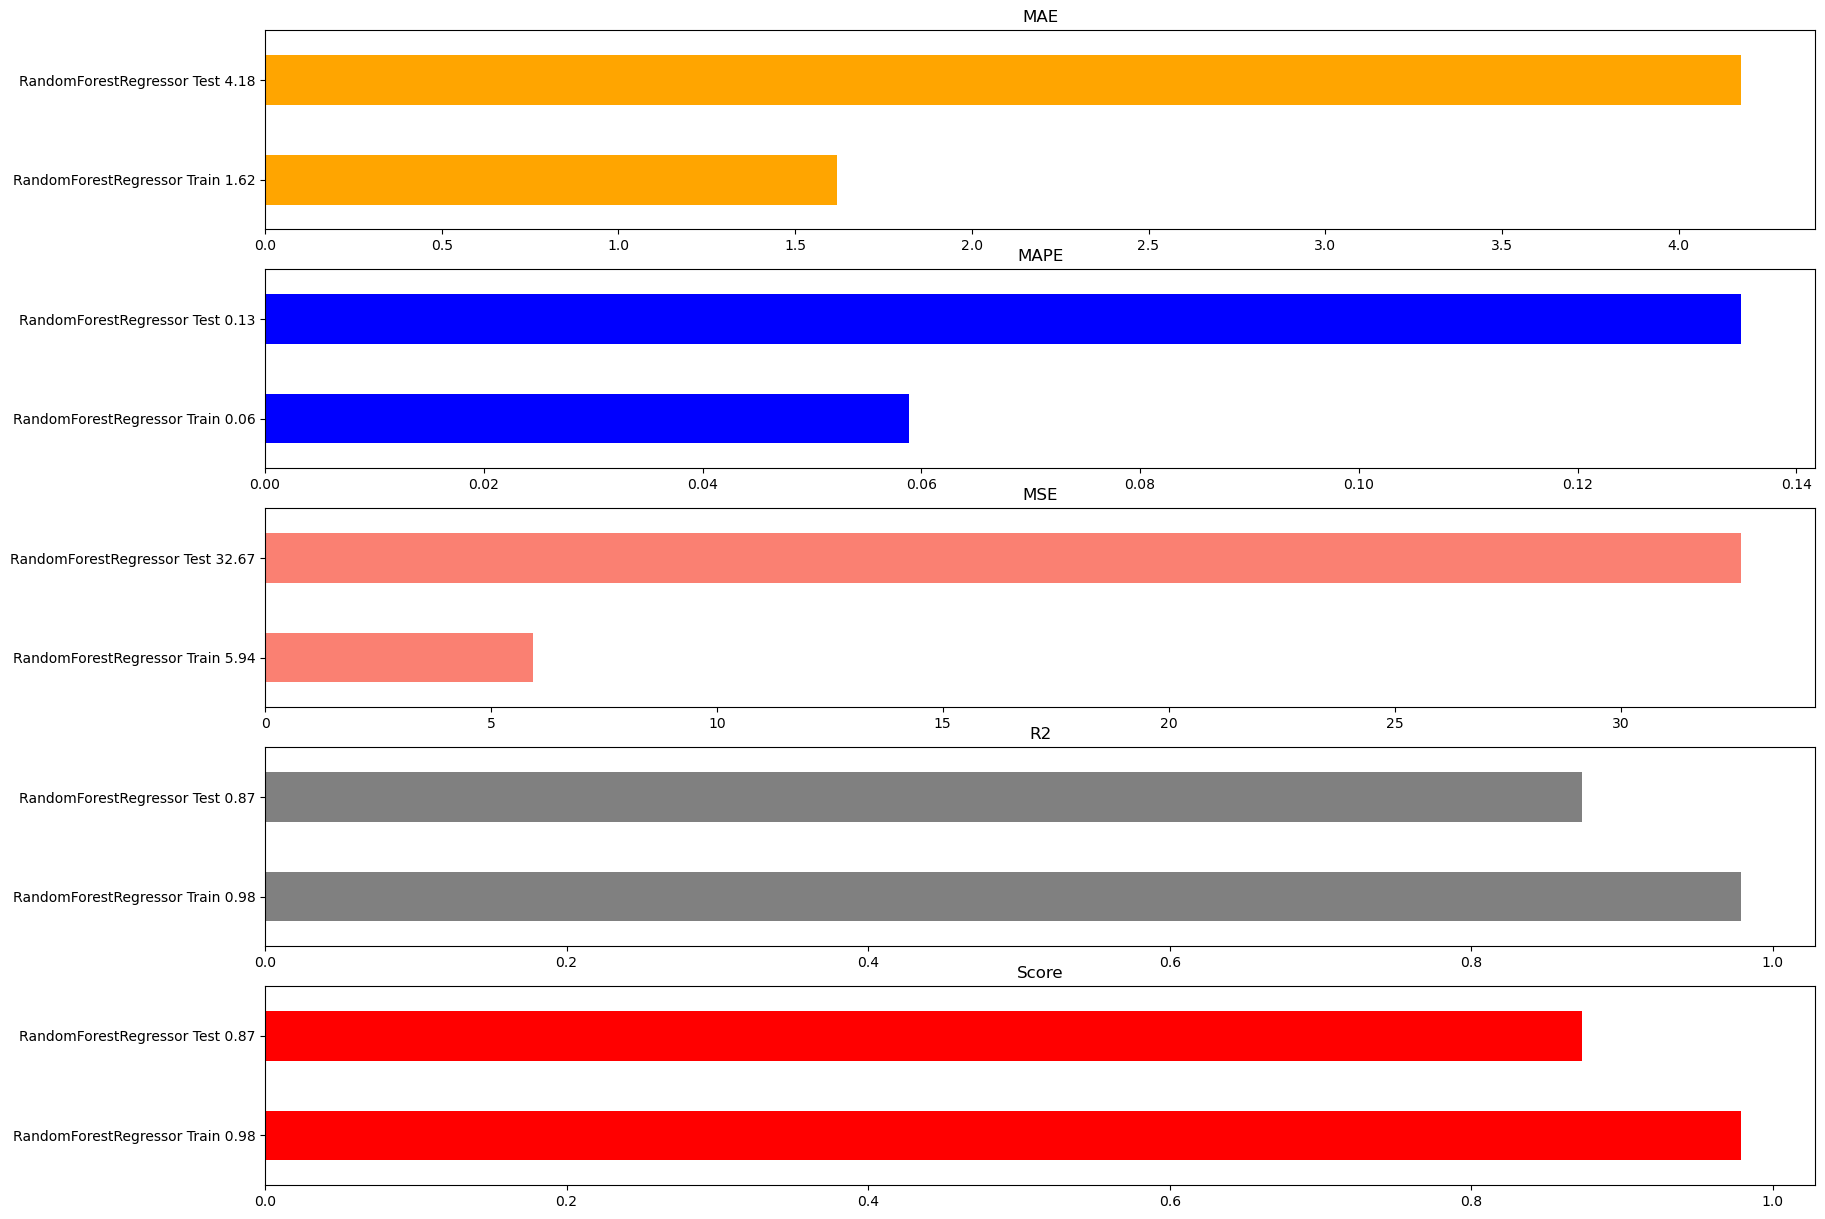

In [513]:
rfr_grid={'model__n_estimators': [500],
          'model__max_depth': [21],
          'model__min_samples_split': [4],
          'model__min_samples_leaf': [1],
          'model__max_features': ['auto'],
          'preprocessor__lab_trans__ohe__drop':[None],
          "pf_trans__pf__degree":[4]}

rfr_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",RandomForestRegressor(n_jobs=6))])

final(rfr_model,"RandomForestRegressor",rfr_grid,ver=4)

### SGDRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-4791720818941980550627328.000 total time=   3.1s

[CV 2/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-105841328049862380464635904.000 total time=   3.3s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 3/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-159011805153703510409216.000 total time=  20.0s

[CV 4/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-6972444678735418582106112.000 total time=   0.9s

[CV 5/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-2658388632317414879526912.000 total time=   5.3s

[CV 1/5] END model__alpha=0.001, model__learning_rate=invscaling, model__loss=squared_epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=2;, score=0.872 total time=   0.0s

[CV 2/5] END model__alpha=0.001, model__learning_rate=invscaling, model__loss=squared_epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=2;, score=0.824 total time=   0.0s

[CV 3/5] END model__al

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-7719568811753916416.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 2/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-126866877017330024448.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 3/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-25036793164003143680.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-11348522559207313408.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 5/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-35119867751991164928.000 total time=   0.2s

[CV 1/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=2;, score=-0.605 total time=   0.3s

[CV 2/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=2;, score=-0.985 total time=   0.2s

[CV 3/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=2;, score=-0.756 total time=   0.3s

[CV 4/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=2;, score=-0.986 total time=   0.2s

[CV 5/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=2;, score=-1.213 total time=   0.2s

[CV 1/5] END mo

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equival

[CV 1/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-1.739 total time=   0.0s

[CV 2/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-2313897.682 total time=   0.0s

[CV 3/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-4301.745 total time=   0.0s

[CV 4/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=0.848 total time=   0.0s

[CV 5/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=2;, score=-419.105 total time=   0.0s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 1/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-7316595210272182272.000 total time=   1.9s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 2/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-34474931618844774400.000 total time=   1.9s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 3/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-18021779297192699904.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 4/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-10117648280303513600.000 total time=   1.9s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 5/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-26841078194355896320.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=3;, score=-23739611555366453248.000 total time=   1.9s

[CV 2/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=3;, score=-152217912944988454912.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 3/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=3;, score=-87681295008109379584.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=3;, score=-15082041806866649088.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 5/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=3;, score=-21159303640410361856.000 total time=   1.8s

[CV 1/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-24046702407284605059072.000 total time=   0.1s

[CV 2/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-52318089585404290269184.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 3/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-1286569496278615982080.000 total time=   3.5s

[CV 4/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-33454858598359635066880.000 total time=   1.2s

[CV 5/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-2311037248651471618048.000 total time=   0.4s

[CV 1/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=4;, score=0.667 total time=   1.3s

[CV 2/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=4;, score=0.585 total time=   1.5s

[CV 3/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equival

[CV 1/5] END model__alpha=0.001, model__learning_rate=optimal, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=-0.084 total time=   0.1s

[CV 2/5] END model__alpha=0.001, model__learning_rate=optimal, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=0.374 total time=   0.1s

[CV 3/5] END model__alpha=0.001, model__learning_rate=optimal, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=0.778 total time=   0.2s

[CV 4/5] END model__alpha=0.001, model__learning_rate=optimal, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=-1.182 total time=   0.1s

[CV 5/5] END model__alpha=0.001, model__learning_rate=optimal, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=0.746 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 1/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-264335907792747520.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 2/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-744196757036782080.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 3/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-660821843147052800.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 4/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-204194981173179008.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 5/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l2, pf_trans__pf__degree=3;, score=-216757542248425536.000 total time=   1.8s

[CV 1/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=4;, score=0.719 total time=   2.5s

[CV 2/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=4;, score=0.681 total time=   2.4s

[CV 3/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=4;, score=0.739 total time=   2.1s

[CV 4/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=4;, score=0.782 total time=   2.2s

[CV 5/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=huber, model__penalty=l1, pf_trans__pf__degree=4;, score=0.767 total time=   2.6s

[CV 1/5]

,MAE,MAPE,MSE,R2,Score
SGDRegressor Train,4.036754,0.138720,29.469017,0.896266,0.896266
SGDRegressor Test,4.671069,0.139873,34.859147,0.864720,0.864720


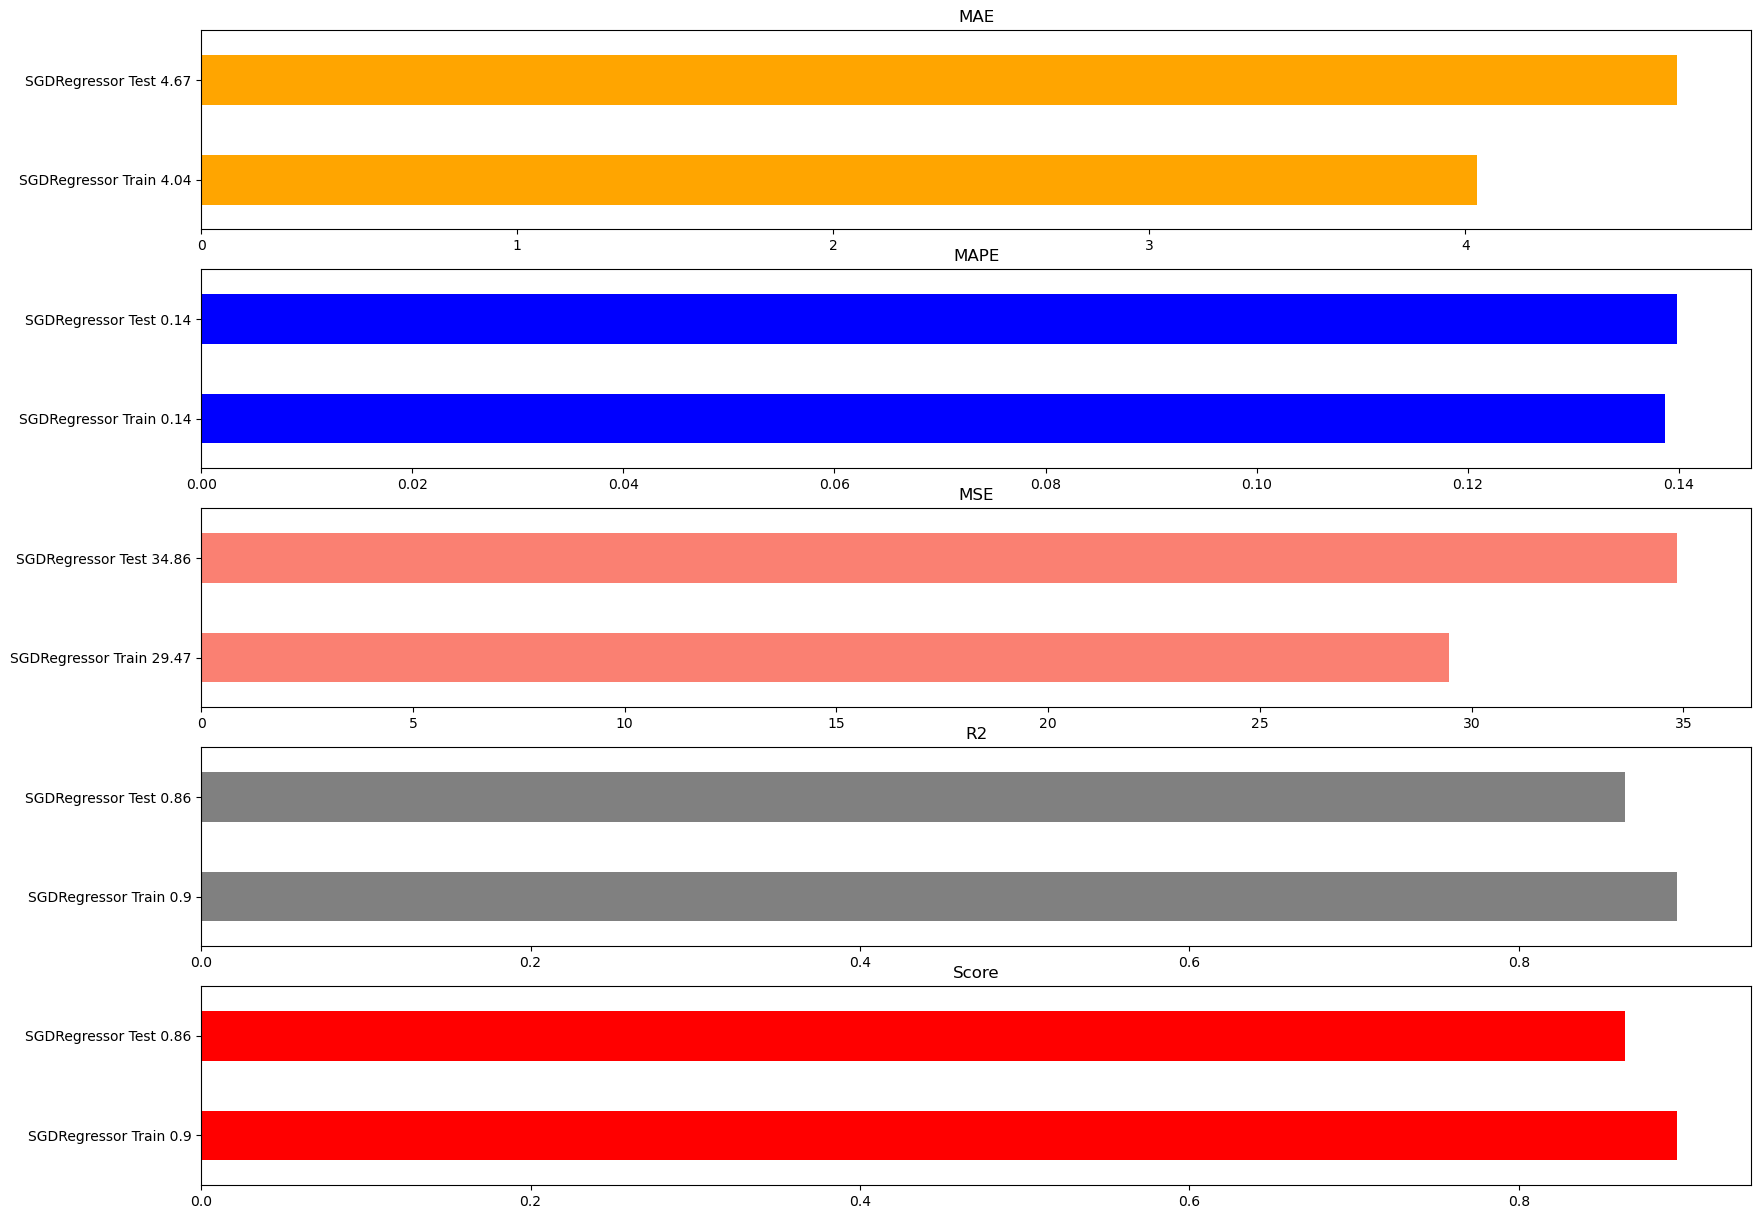

In [356]:
np.random.seed(42)

sgd_grid = {"pf_trans__pf__degree":np.asarray([2,3,4]),
            'model__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'model__penalty': ['none', 'l2', 'l1', 'elasticnet'],
            'model__alpha': [0.0001, 0.001, 0.01, 0.1],
            'model__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}

sgd_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",SGDRegressor())])
try_it(sgd_model,"SGDRegressor",sgd_grid,itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-9163469380858491399022051328.000 total time=   0.1s

[CV 2/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-3403235390778069817688588288.000 total time=   0.2s

[CV 3/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-9399649534513039948178784256.000 total time=   0.2s

[CV 4/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-1031700309706368973734412288.000 total time=   0.1s

[CV 5/5] END model__alpha=0.001, model__learning_rate=constant, model

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equival

[CV 1/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-11661236275721650881691648.000 total time=   1.5s

[CV 2/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-4780211305385739142823936.000 total time=   1.5s

[CV 3/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-2347176273158954570219520.000 total time=   1.6s

[CV 4/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-6014060405287918027931648.000 total time=   2.5s

[CV 5/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=-636944944097167558049792.000 

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-1413504439452713336438784.000 total time=   0.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 2/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-1943101975052373454749696.000 total time=   1.0s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 3/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-21688275116064811100667904.000 total time=   0.7s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-923746009829430406414336.000 total time=   0.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 5/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-563288138854798393868288.000 total time=   0.7s

[CV 1/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-327.837 total time=   0.0s

[CV 2/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-302.867 total time=   0.0s

[CV 3/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-347.461 total time=   0.0s

[CV 4/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-275.916 total time=   0.0s

[CV 5/5] END model__alpha=0.1, model__learning_rate=invscaling, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-293.947 total tim

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equival

[CV 2/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=2;, score=-53.490 total time=   0.0s

[CV 3/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=2;, score=-42.956 total time=   0.0s

[CV 4/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=2;, score=-35.133 total time=   0.0s

[CV 5/5] END model__alpha=0.1, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=2;, score=-42.922 total time=   0.0s

[CV 1/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=2;, score=-188.324 total time=   0.0s

[CV 2/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=2;, score=-

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.0001, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-4599877955335109134801436672.000 total time=   0.1s

[CV 2/5] END model__alpha=0.0001, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-30545713157492249922763751424.000 total time=   0.1s

[CV 3/5] END model__alpha=0.0001, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-478218079526785698064498688.000 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.0001, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-4466210921961764636967567360.000 total time=   0.1s

[CV 5/5] END model__alpha=0.0001, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-596227346013154490659635200.000 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.war

[CV 1/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=2;, score=-15944465366892680.000 total time=   0.2s

[CV 2/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=2;, score=-182704085752538784.000 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 3/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=2;, score=-477061368401270976.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=2;, score=-20990507663121432.000 total time=   0.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 5/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l2, pf_trans__pf__degree=2;, score=-671097529048279936.000 total time=   0.2s

[CV 1/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-63.354 total time=   0.0s

[CV 2/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-65.852 total time=   0.0s

[CV 3/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-61.946 total time=   0.0s

[CV 4/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-41.994 total time=   0.0s

[CV 5/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-48.978 total time=   0.0s

[CV 1/5] END 

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=4;, score=-2199090402172830671175680.000 total time=   1.6s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 2/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=4;, score=-9846296098202198514597888.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 3/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=4;, score=-14498975462366243582902272.000 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=4;, score=-3259067787466767981346816.000 total time=   1.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 5/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=4;, score=-422659629456465200152576.000 total time=   1.1s

SGDRegressor

{'pf_trans__pf__degree': 2, 'model__penalty': 'elasticnet', 'model__loss': 'epsilon_insensitive', 'model__learning_rate': 'constant', 'model__alpha': 0.0001} 

 -45.986


,MAE,MAPE,MSE,R2,Score
SGDRegressor Train,3.934407,0.131968,32.881971,0.884252,-32.881971
SGDRegressor Test,4.498522,0.130597,34.355178,0.866676,-34.355178


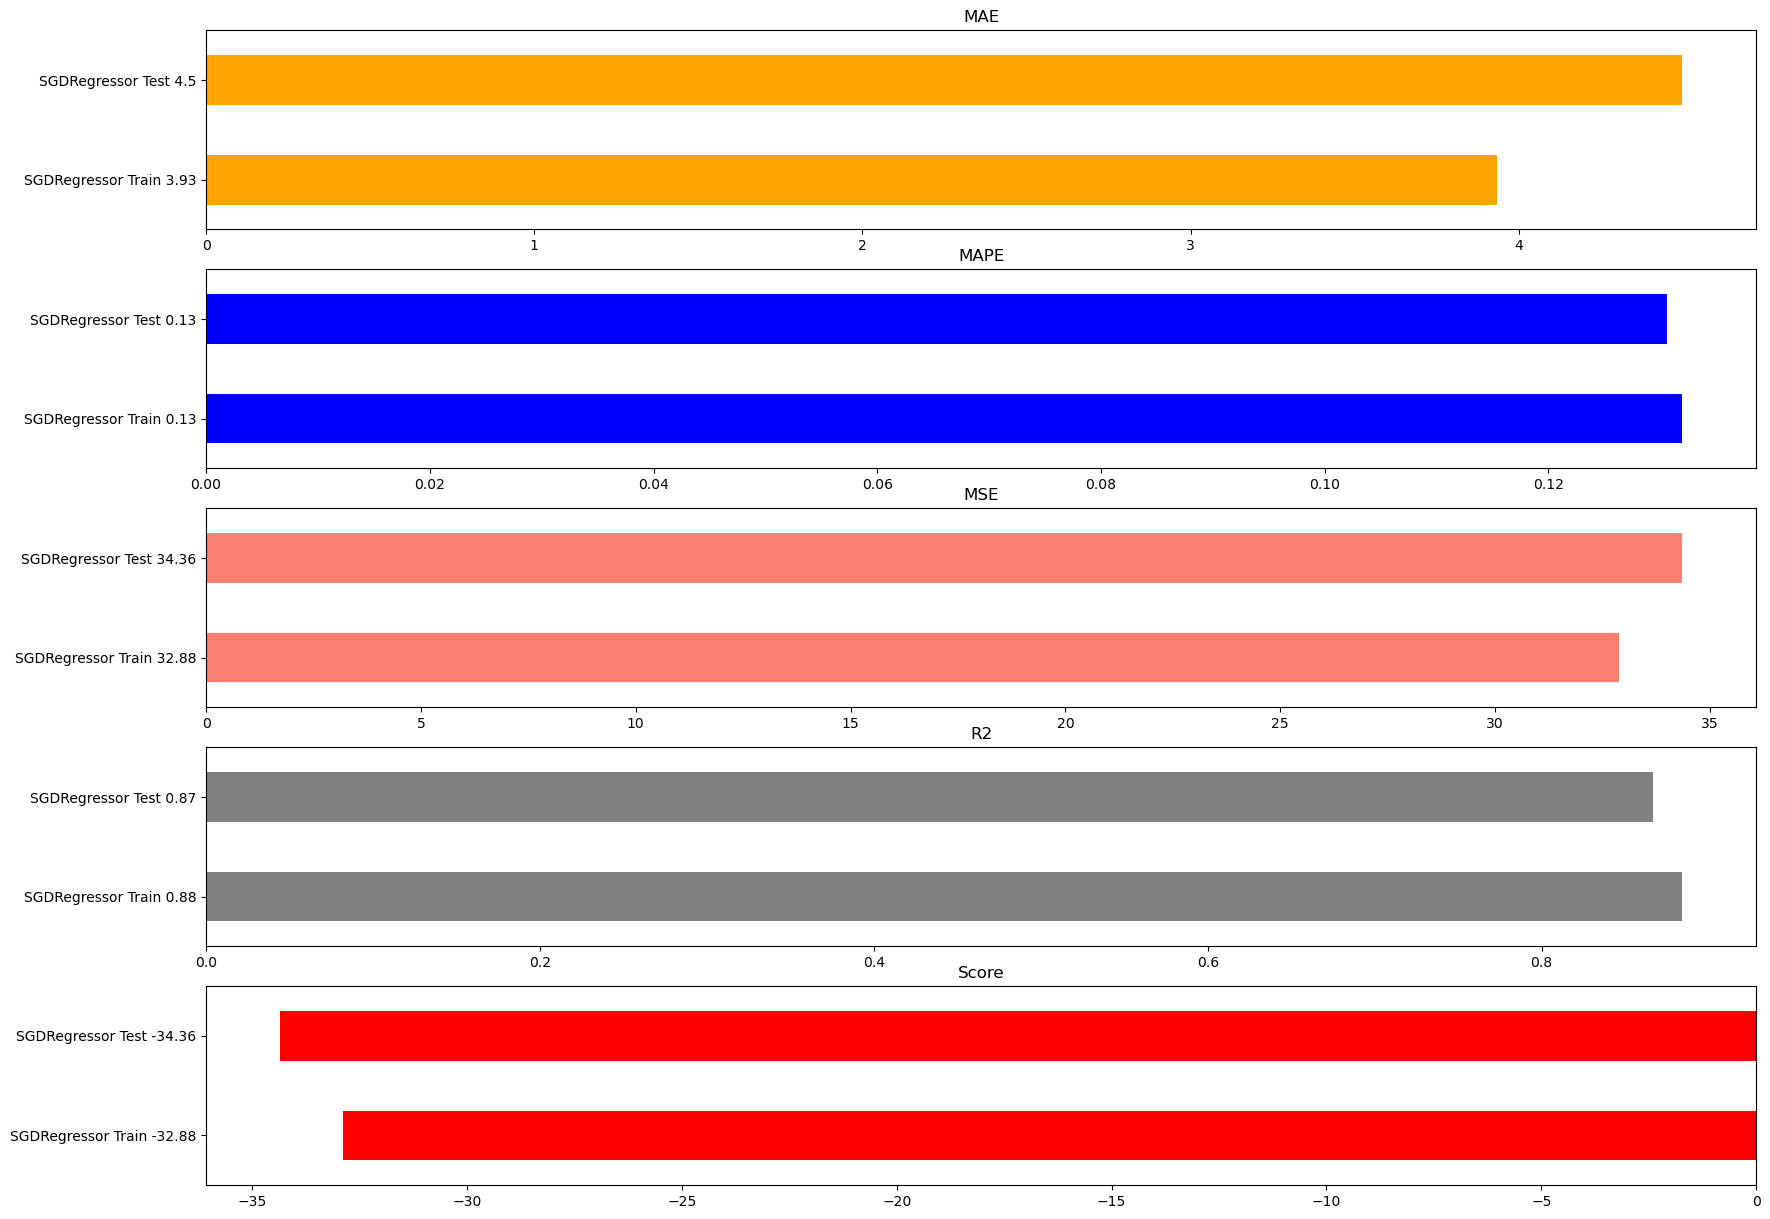

In [357]:
np.random.seed(6)

try_it(sgd_model,"SGDRegressor",sgd_grid,sc='neg_mean_squared_error',itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=-1093033235152.268 total time=   0.5s

[CV 2/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=-625234460242.580 total time=   0.2s

[CV 3/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=-627816413234.470 total time=   0.2s

[CV 4/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=-523515416537.339 total time=   1.2s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(


[CV 5/5] END model__alpha=0.1, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=3;, score=-437692210954.917 total time=   1.9s

[CV 1/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=4;, score=-5.176 total time=   0.8s

[CV 2/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=4;, score=-6.905 total time=   0.6s

[CV 3/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=4;, score=-6.883 total time=   0.6s

[CV 4/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=epsilon_insensitive, model__penalty=none, pf_trans__pf__degree=4;, score=-5.566 total time=   0.6s

[CV 5/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=epsilon_insen

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=3;, score=-59256366360.233 total time=   1.9s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 2/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=3;, score=-77233977032.204 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 3/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=3;, score=-69264447134.499 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=3;, score=-71975524710.778 total time=   1.8s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.war

[CV 5/5] END model__alpha=0.01, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=3;, score=-82353411054.109 total time=   1.8s

[CV 1/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-175945467504.462 total time=   0.0s

[CV 2/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-296142840257.024 total time=   0.0s

[CV 3/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-257195435190.121 total time=   0.0s

[CV 4/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-348299870811.501 total time=   0.0s

[CV 5/5] END model__alpha=0.0001, model__learning_rate=invscaling, model__loss=squared_loss, model

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-397523451367.192 total time=   1.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 2/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-818785815790.497 total time=   1.0s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 3/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-540936351155.378 total time=   0.9s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-500760579954.046 total time=   0.9s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 5/5] END model__alpha=0.001, model__learning_rate=adaptive, model__loss=squared_loss, model__penalty=none, pf_trans__pf__degree=4;, score=-261510418391.004 total time=   0.8s

[CV 1/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.488 total time=   0.0s

[CV 2/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.844 total time=   0.0s

[CV 3/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.947 total time=   0.0s

[CV 4/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-4.648 total time=   0.0s

[CV 5/5] END model__alpha=0.1, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.423 total time=   0.0s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.01, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-31632729607148.945 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 2/5] END model__alpha=0.01, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-17886805106188.156 total time=   0.1s

[CV 3/5] END model__alpha=0.01, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-15433188443121.248 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.01, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-17829814391623.715 total time=   0.3s

[CV 5/5] END model__alpha=0.01, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-10463099425746.281 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.524 total time=   0.0s

[CV 2/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.845 total time=   0.0s

[CV 3/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.885 total time=   0.0s

[CV 4/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-4.679 total time=   0.0s

[CV 5/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=huber, model__penalty=none, pf_trans__pf__degree=2;, score=-5.267 total time=   0.0s

[CV 1/5] END model__alpha=0.0001, model__learning_rate=constant, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-5.472 total time=   0.0s

[CV 2/5] END mo

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equival

[CV 5/5] END model__alpha=0.001, model__learning_rate=constant, model__loss=squared_loss, model__penalty=elasticnet, pf_trans__pf__degree=3;, score=-1315107852569.392 total time=   0.0s

[CV 1/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-3.998 total time=   0.3s

[CV 2/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-5.067 total time=   0.3s

[CV 3/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-3.847 total time=   0.4s

[CV 4/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=3;, score=-4.329 total time=   0.3s

[CV 5/5] END model__alpha=0.0001, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 2/5] END model__alpha=0.0001, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-142962541207584.438 total time=   0.1s

[CV 3/5] END model__alpha=0.0001, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-110891744358164.828 total time=   0.0s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(

C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 4/5] END model__alpha=0.0001, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-59000559877782.984 total time=   0.1s

[CV 5/5] END model__alpha=0.0001, model__learning_rate=optimal, model__loss=squared_loss, model__penalty=l1, pf_trans__pf__degree=3;, score=-42499782031396.281 total time=   0.1s


C:\Users\oem\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.

  warnings.warn(


[CV 1/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-5192548510911.006 total time=   0.7s

[CV 2/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-5134056904604.454 total time=   0.8s

[CV 3/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-19998050167061.871 total time=   0.5s

[CV 4/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-13822095516504.885 total time=   0.4s

[CV 5/5] END model__alpha=0.01, model__learning_rate=optimal, model__loss=squared_epsilon_insensitive, model__penalty=elasticnet, pf_trans__pf__degree=4;, score=-6519161952918.130 total time=   0.4s

,MAE,MAPE,MSE,R2,Score
SGDRegressor Train,2.596674,0.094359,16.833324,0.940745,-2.596674
SGDRegressor Test,4.010582,0.124472,32.060528,0.875581,-4.010582


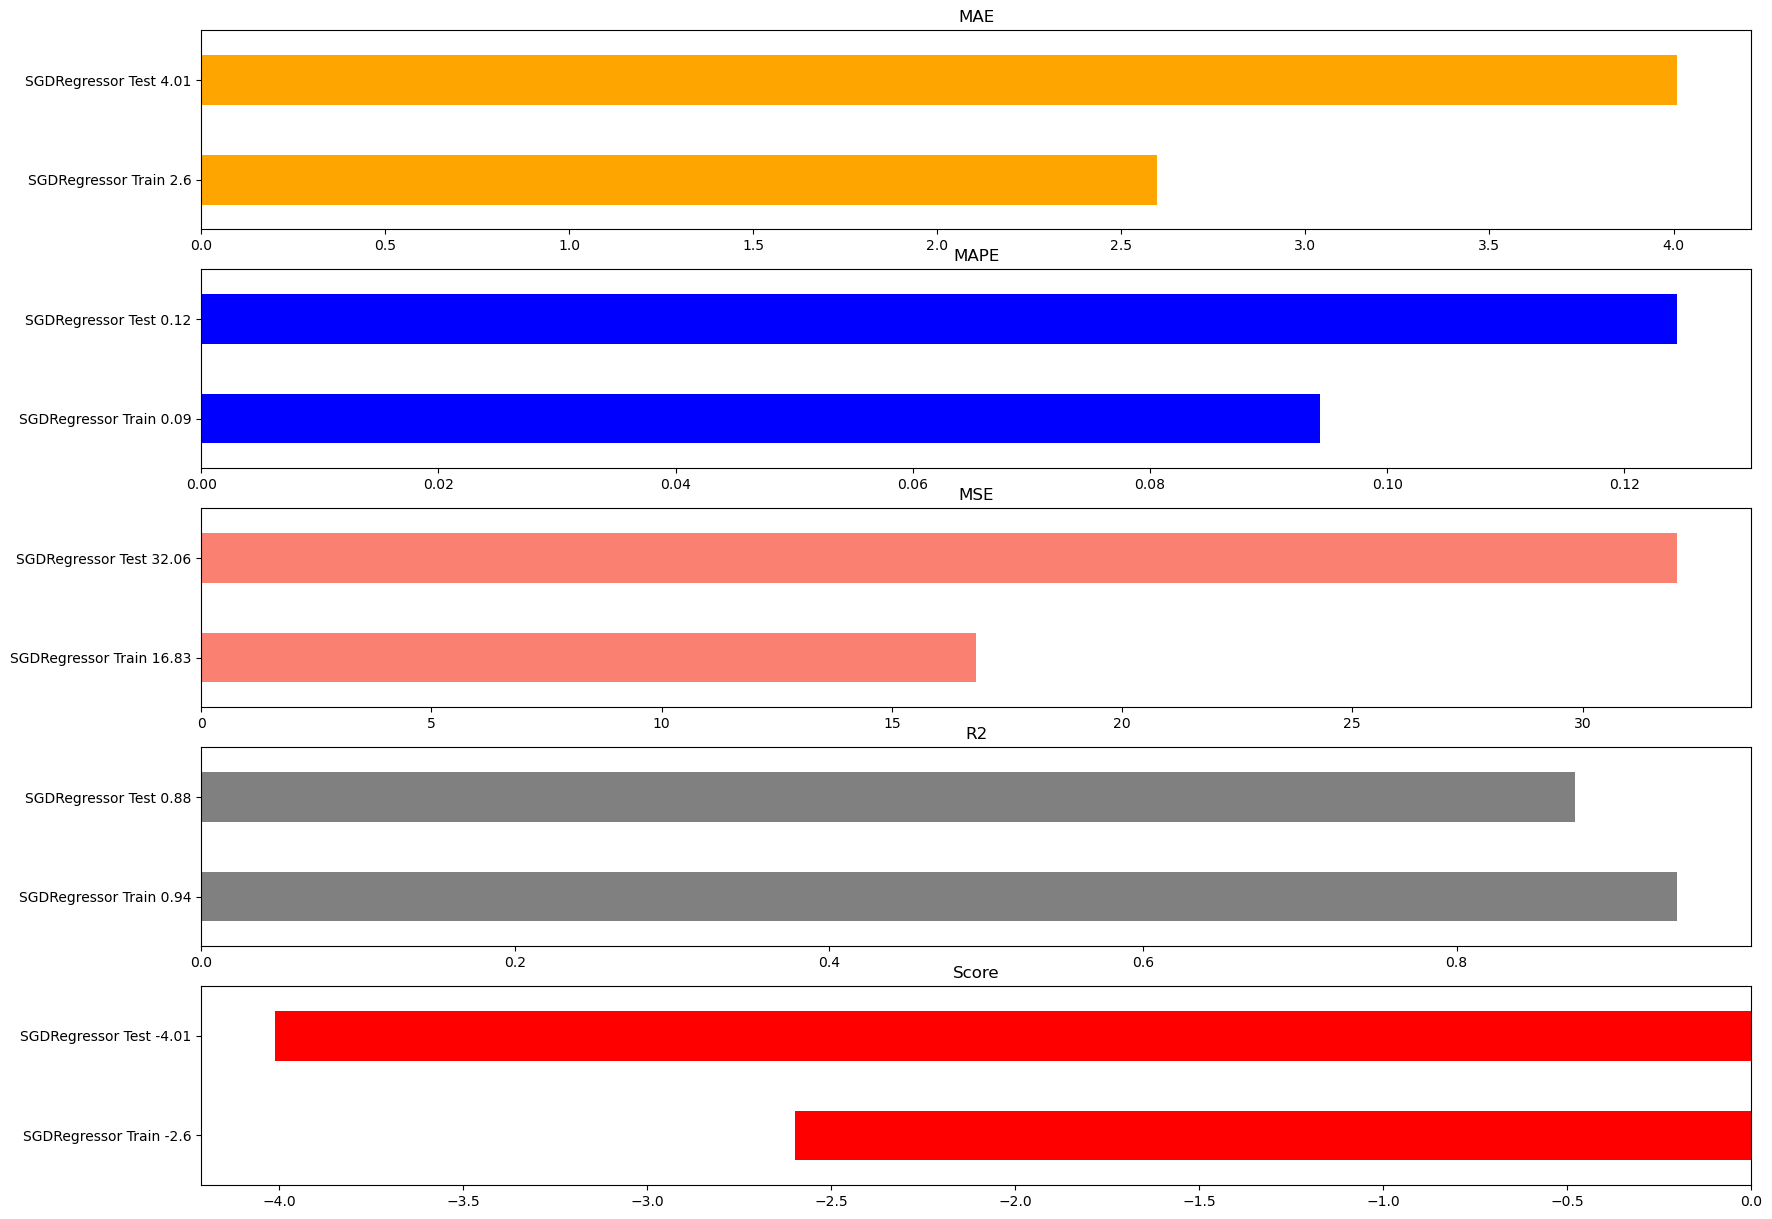

In [358]:
np.random.seed(0)

try_it(sgd_model,"SGDRegressor",sgd_grid,sc='neg_mean_absolute_error',itr=20,ver=4)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

[CV 1/5] END model__alpha=1e-05, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=0.881 total time=   1.6s

[CV 2/5] END model__alpha=1e-05, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=0.669 total time=   1.8s

[CV 3/5] END model__alpha=1e-05, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=0.664 total time=   2.3s

[CV 4/5] END model__alpha=1e-05, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=0.586 total time=   2.2s

[CV 5/5] END model__alpha=1e-05, model__learning_rate=adaptive, model__loss=epsilon_insensitive, model__penalty=l1, pf_trans__pf__degree=4;, score=0.810 total time=   2.1s

SGDRegressor

{'model__alpha': 1e-05, 'model__learning_rate': 'adaptive', '

,MAE,MAPE,MSE,R2,Score
SGDRegressor Train,2.174066,0.076064,13.564769,0.952251,0.952251
SGDRegressor Test,3.934241,0.123230,29.569580,0.885247,0.885247


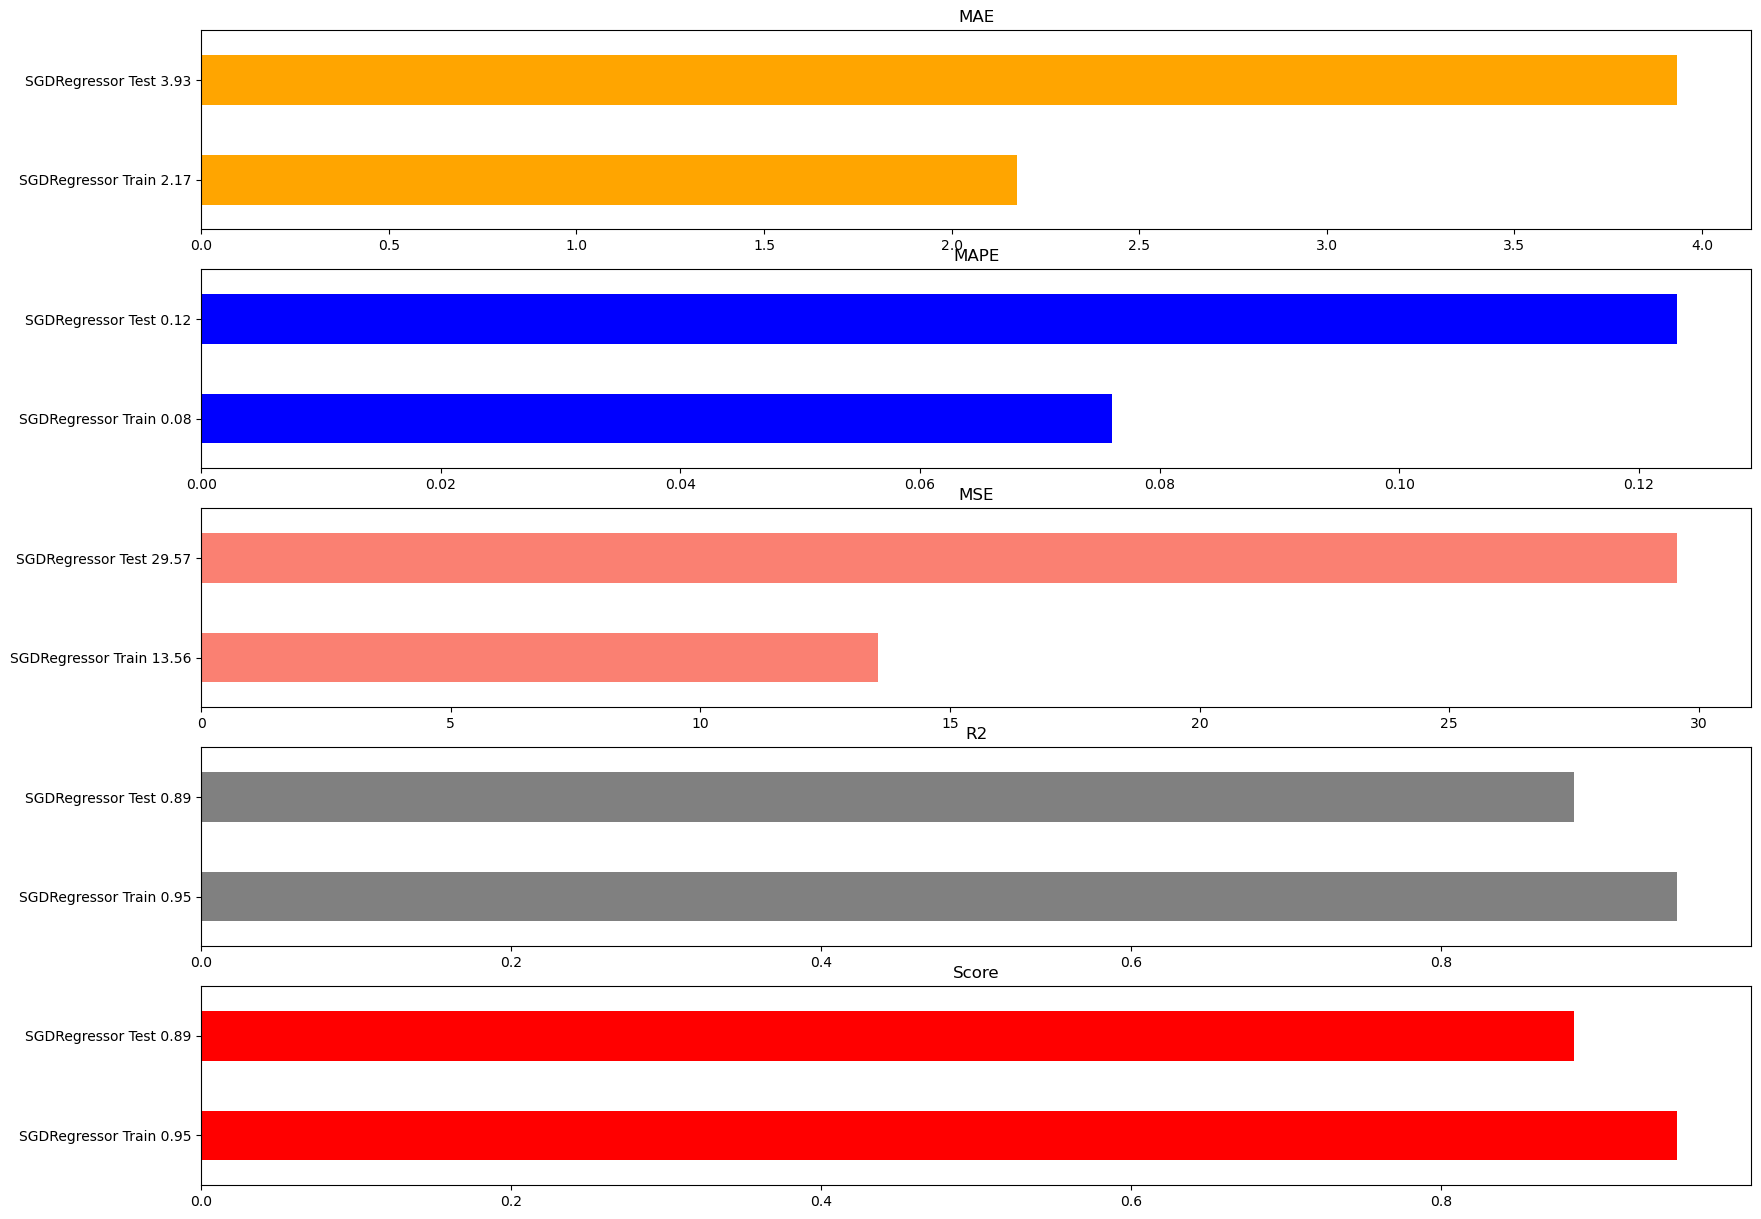

In [475]:
sgd_grid = {"pf_trans__pf__degree":[4],
            'model__loss': ['epsilon_insensitive'],
            'model__penalty': ['l1'],
            'model__alpha': [0.00001],
            'model__learning_rate': ['adaptive']}


sgd_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",SGDRegressor())])
final(sgd_model,"SGDRegressor",sgd_grid,ver=4)


### KNeigborsRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__algorithm=auto, model__leaf_size=48, model__n_neighbors=2, model__p=1, model__weights=distance, pf_trans__pf__degree=2;, score=0.669 total time=   0.0s

[CV 2/5] END model__algorithm=auto, model__leaf_size=48, model__n_neighbors=2, model__p=1, model__weights=distance, pf_trans__pf__degree=2;, score=0.598 total time=   0.0s

[CV 3/5] END model__algorithm=auto, model__leaf_size=48, model__n_neighbors=2, model__p=1, model__weights=distance, pf_trans__pf__degree=2;, score=0.754 total time=   0.0s

[CV 4/5] END model__algorithm=auto, model__leaf_size=48, model__n_neighbors=2, model__p=1, model__weights=distance, pf_trans__pf__degree=2;, score=0.755 total time=   0.0s

[CV 5/5] END model__algorithm=auto, model__leaf_size=48, model__n_neighbors=2, model__p=1, model__weights=distance, pf_trans__pf__degree=2;, score=0.655 total time=   0.0s

[CV 1/5] END model__algorithm=auto, model__leaf_size=3, model__n_neighbo

,MAE,MAPE,MSE,R2,Score
KNeighborsRegressor Train,0.057612,0.001668,0.698360,0.997542,0.997542
KNeighborsRegressor Test,5.062432,0.164884,51.776368,0.799068,0.799068


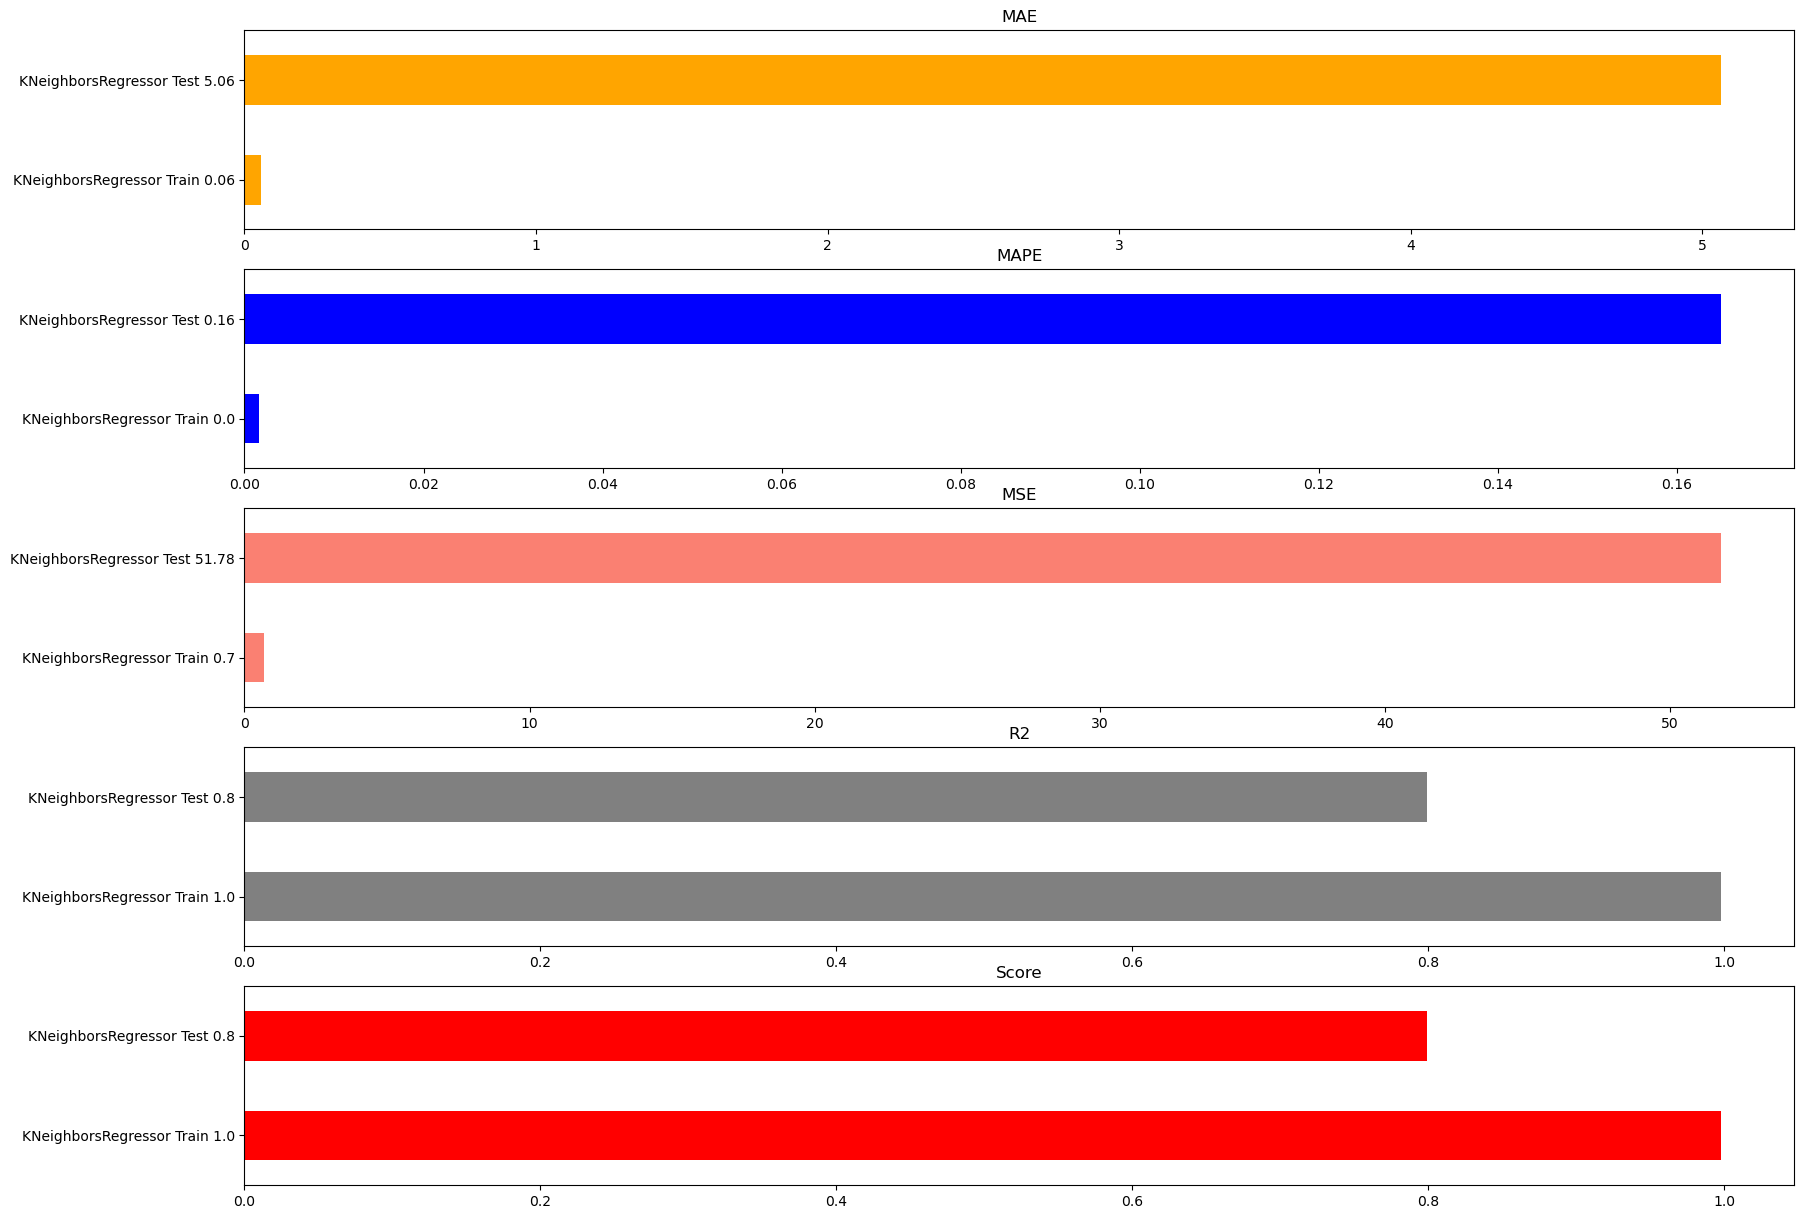

In [364]:
np.random.seed(42)

kn_grid = {"pf_trans__pf__degree":np.asarray([2,3,4]),
           'model__n_neighbors': np.arange(2, 30),
           'model__weights': ['uniform', 'distance'],
           'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
           'model__leaf_size': np.arange(1, 61),
           'model__p': [1, 2]}

kn_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",KNeighborsRegressor())])
try_it(kn_model,"KNeighborsRegressor",kn_grid,itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__algorithm=ball_tree, model__leaf_size=35, model__n_neighbors=5, model__p=2, model__weights=uniform, pf_trans__pf__degree=2;, score=-103.140 total time=   0.0s

[CV 2/5] END model__algorithm=ball_tree, model__leaf_size=35, model__n_neighbors=5, model__p=2, model__weights=uniform, pf_trans__pf__degree=2;, score=-97.048 total time=   0.0s

[CV 3/5] END model__algorithm=ball_tree, model__leaf_size=35, model__n_neighbors=5, model__p=2, model__weights=uniform, pf_trans__pf__degree=2;, score=-61.082 total time=   0.0s

[CV 4/5] END model__algorithm=ball_tree, model__leaf_size=35, model__n_neighbors=5, model__p=2, model__weights=uniform, pf_trans__pf__degree=2;, score=-72.552 total time=   0.0s

[CV 5/5] END model__algorithm=ball_tree, model__leaf_size=35, model__n_neighbors=5, model__p=2, model__weights=uniform, pf_trans__pf__degree=2;, score=-80.871 total time=   0.0s

[CV 1/5] END model__algorithm=kd_tree, mo

,MAE,MAPE,MSE,R2,Score
KNeighborsRegressor Train,0.057612,0.001668,0.698360,0.997542,-0.698360
KNeighborsRegressor Test,5.278666,0.175582,53.105866,0.793909,-53.105866


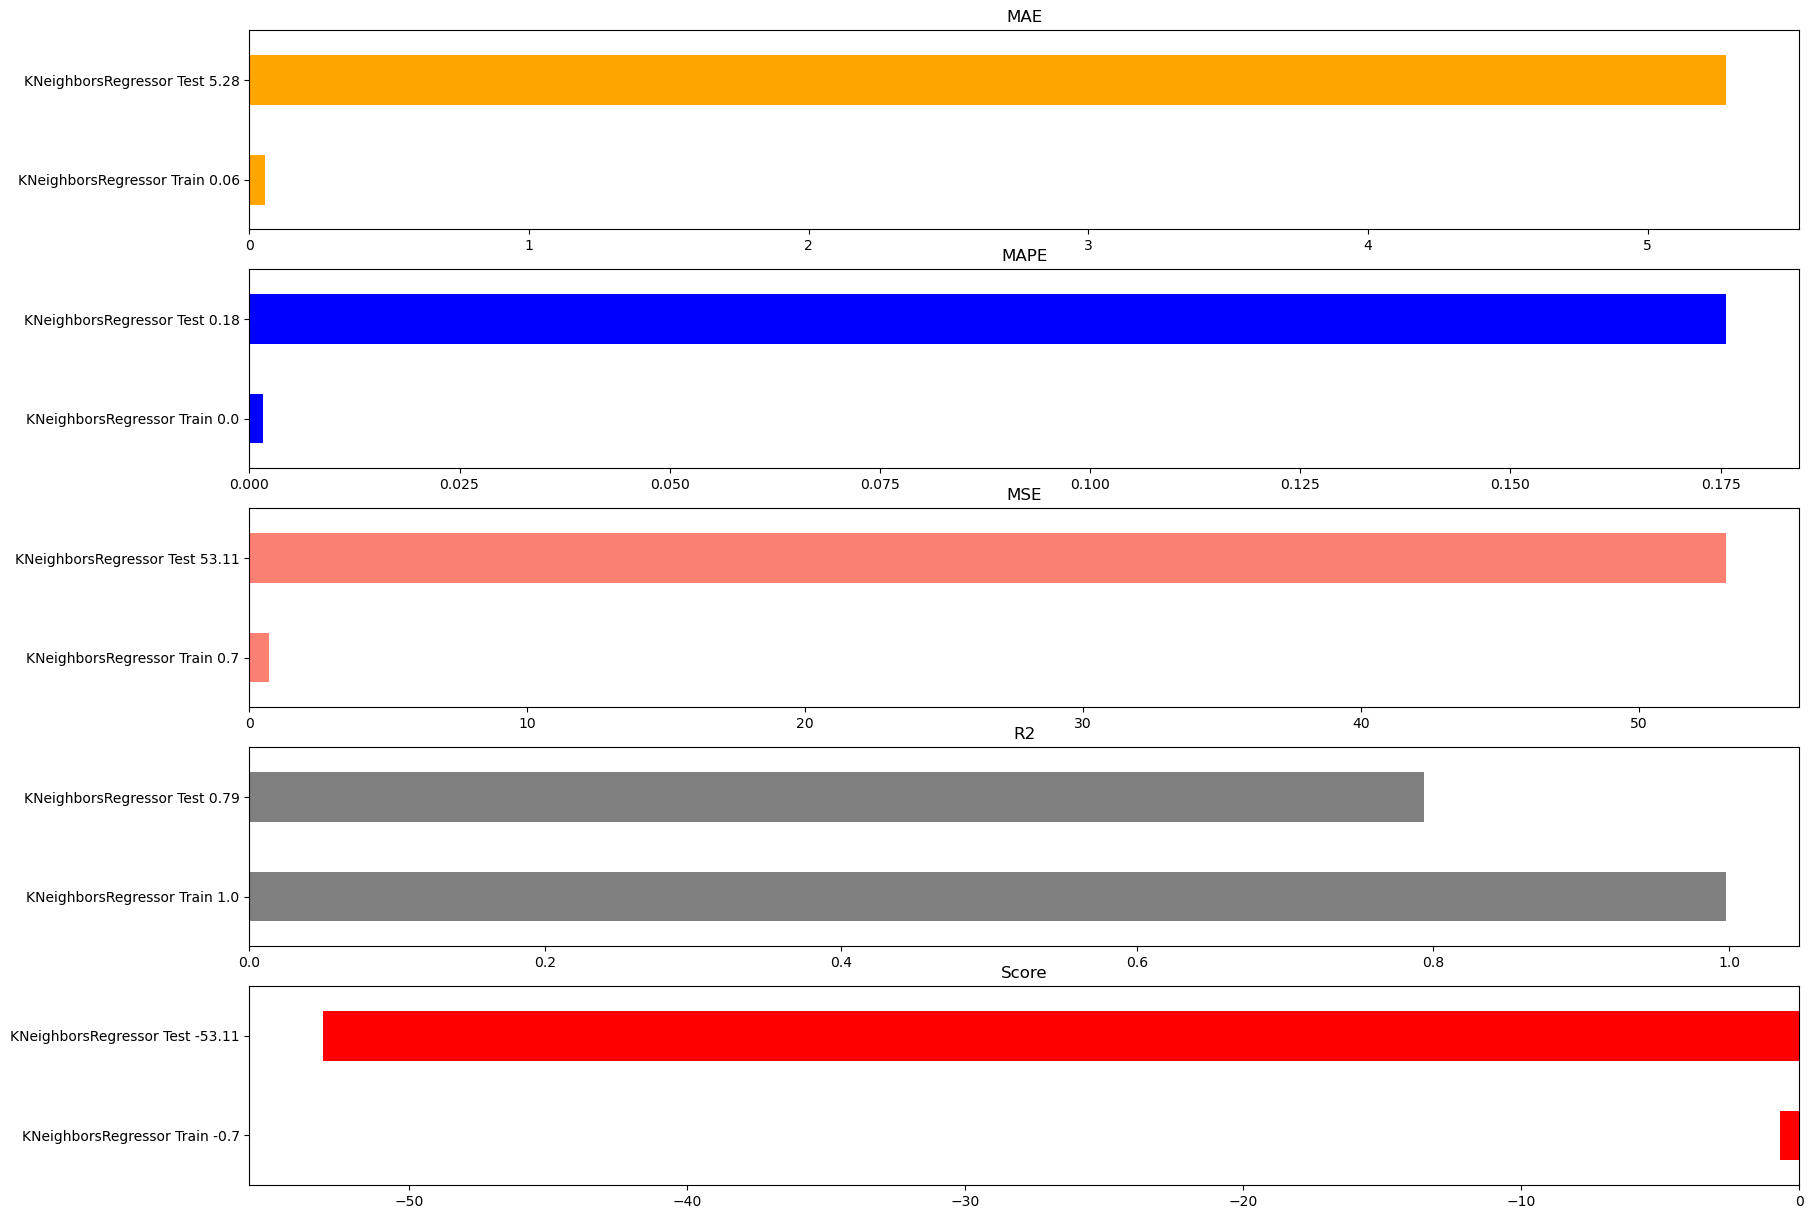

In [365]:
np.random.seed(6)

try_it(kn_model,"KNeighborsRegressor",kn_grid,"neg_mean_squared_error",itr=20,ver=4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

[CV 1/5] END model__algorithm=brute, model__leaf_size=24, model__n_neighbors=7, model__p=1, model__weights=uniform, pf_trans__pf__degree=2;, score=-7.365 total time=   0.0s

[CV 2/5] END model__algorithm=brute, model__leaf_size=24, model__n_neighbors=7, model__p=1, model__weights=uniform, pf_trans__pf__degree=2;, score=-7.008 total time=   0.0s

[CV 3/5] END model__algorithm=brute, model__leaf_size=24, model__n_neighbors=7, model__p=1, model__weights=uniform, pf_trans__pf__degree=2;, score=-5.938 total time=   0.0s

[CV 4/5] END model__algorithm=brute, model__leaf_size=24, model__n_neighbors=7, model__p=1, model__weights=uniform, pf_trans__pf__degree=2;, score=-6.405 total time=   0.0s

[CV 5/5] END model__algorithm=brute, model__leaf_size=24, model__n_neighbors=7, model__p=1, model__weights=uniform, pf_trans__pf__degree=2;, score=-6.710 total time=   0.0s

[CV 1/5] END model__algorithm=kd_tree, model__leaf_size=10, model__

,MAE,MAPE,MSE,R2,Score
KNeighborsRegressor Train,0.057612,0.001668,0.698360,0.997542,-0.057612
KNeighborsRegressor Test,4.976891,0.163396,51.419285,0.800454,-4.976891


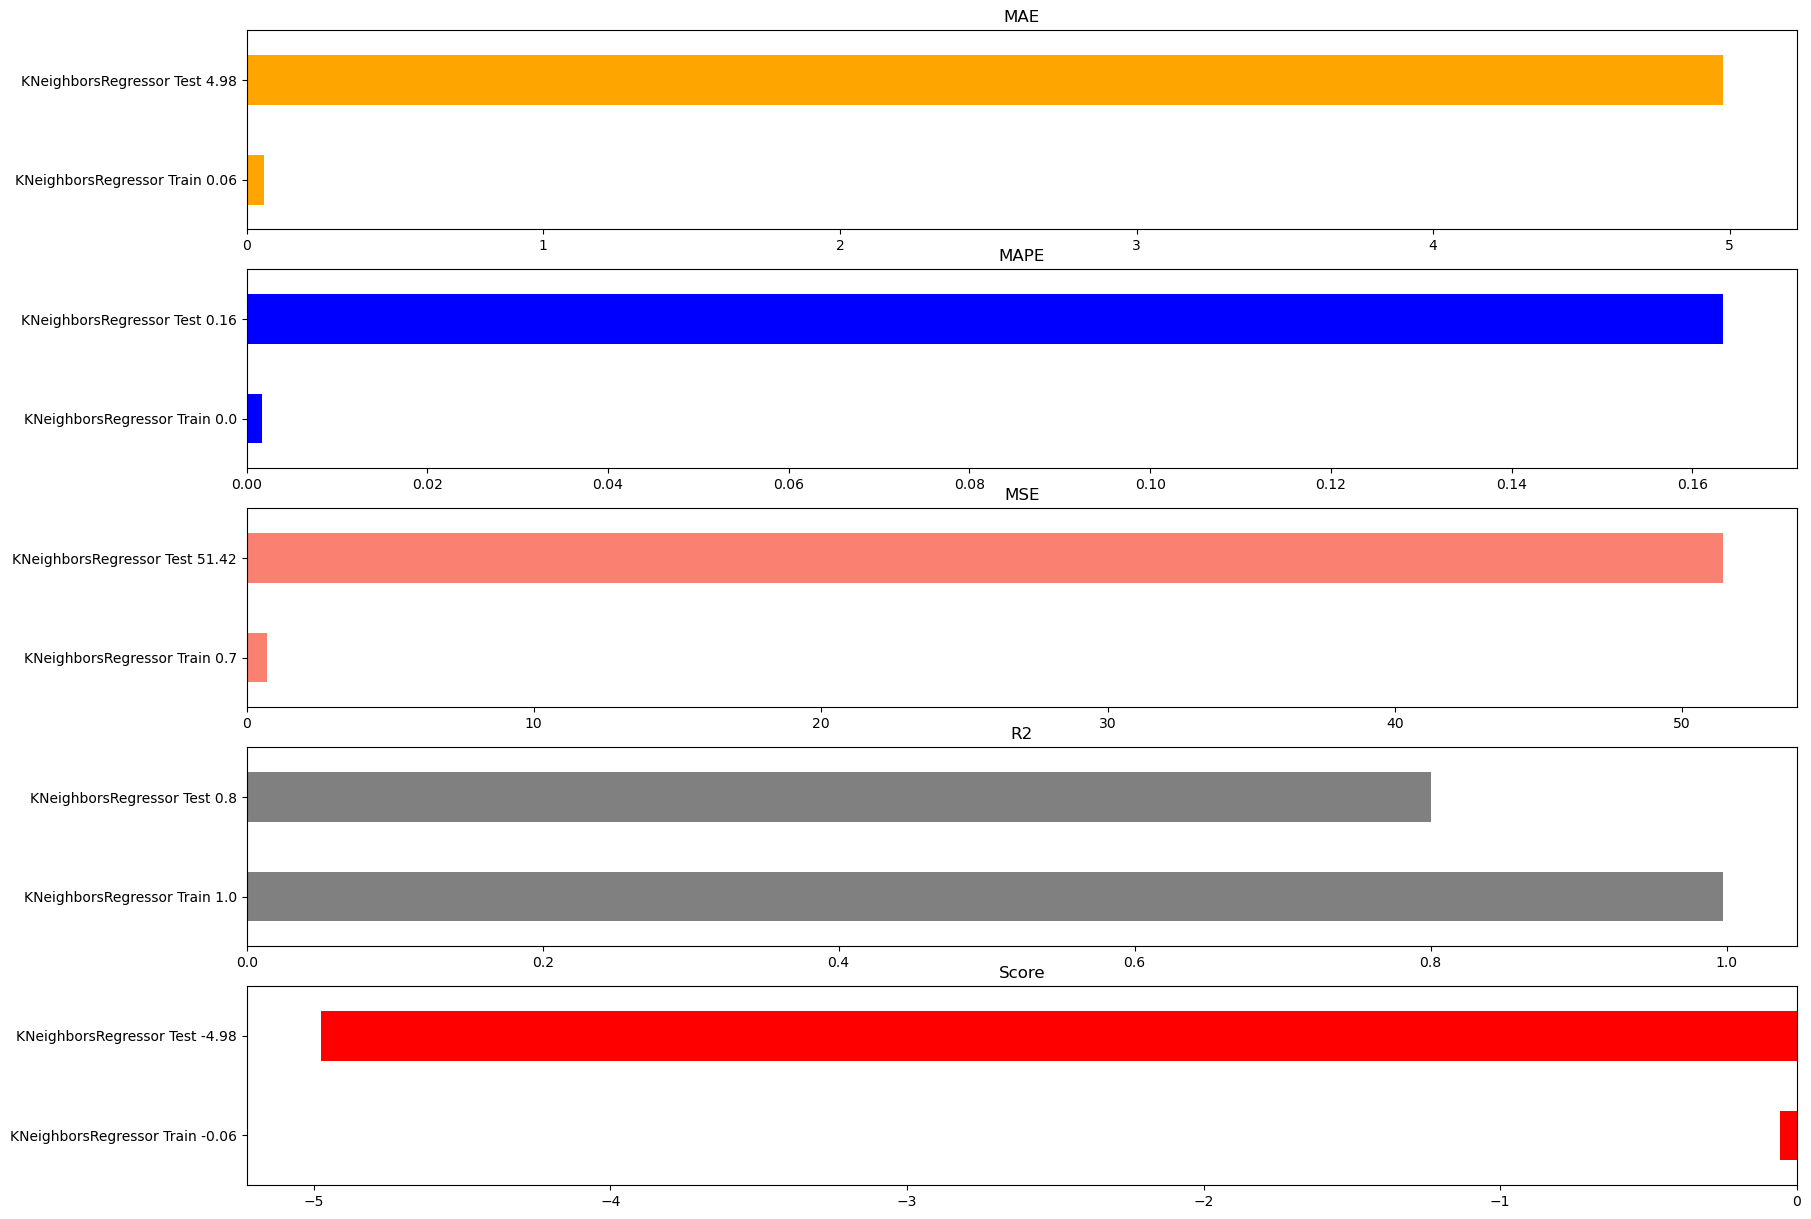

In [366]:
np.random.seed(0)

try_it(kn_model,"KNeighborsRegressor",kn_grid,"neg_mean_absolute_error",itr=20,ver=4)

## Evaluate Best Models

In [520]:
def final_eval(x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,
               models=[xgb_model,rg_model,rfr_model,sgd_model],
               mo_na=["XGBRegressor","Ridge","RandomForestRegressor","SGDRegressor"],
               grids=[xgb_grid,r_grid,rfr_grid,sgd_grid],c=5,ver=1):
    """
    Function To Evaluate Final Models & Return Scores in Horizontal Bar 
    """
    # Make Dict. With Scores & Convert it to DataFrame
    m_sc={}
    for mo,na,ga in zip(models,mo_na,grids):
        model=GridSearchCV(mo,ga,cv=c,verbose=ver,n_jobs=6)
        model.fit(x_train,y_train)
        y_pre=model.predict(x_test)
        MAE=mean_absolute_error(y_test,y_pre)
        MSE=mean_squared_error(y_test,y_pre)
        MSLE=mean_squared_log_error(y_test,y_pre)
        R2=r2_score(y_test,y_pre)
        score=model.score(x_test,y_test)
        m_sc[na]=[MAE,MSE,MSLE,R2,score]
        scrs=pd.DataFrame(m_sc,index=['MAE','MSE','MSLE','R2','Score'])
    # Plot Each Metric
    l=0
    plt.figure(figsize=(9,20))
    # plt.figure(edgecolor='k')
    for i,c in zip(scrs.index,['orange','k','grey','blue','salmon']):
        plt.subplot(5,1,l+1)
        y=[f"{x} : ({y.round(2)})" for x,y in zip(scrs.columns,scrs.loc[i].values)]
        scrs.loc[i].plot(kind='barh',title=f"{i} Scores",color=c,edgecolor='k')
        plt.yticks(range(0,len(y)),y)
        l+=1
    return scrs

In [529]:
pf_trans=Pipeline([('pf',PolynomialFeatures())])


xgb_grid = {"pf_trans__pf__degree":[2],'model__n_estimators': [250],'model__learning_rate': [0.1],
            'model__max_depth': [5],'model__subsample': [0.6],'model__colsample_bytree': [0.3],
            'model__gamma': [0.333],'model__reg_alpha': [0.001],'model__reg_lambda': [0.0001]}

xgb_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",XGBRegressor())])




r_grid={"model__alpha":[0.01],'preprocessor__lab_trans__ohe__drop':[None],"pf_trans__pf__degree":[2]}

rg_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",Ridge(max_iter=99999999))])




rfr_grid={'model__n_estimators': [500],'model__max_depth': [21],'model__min_samples_split': [4],
          'model__min_samples_leaf': [1],'model__max_features': ['auto'],'preprocessor__lab_trans__ohe__drop':[None],
          "pf_trans__pf__degree":[4]}

rfr_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",RandomForestRegressor(n_jobs=6))])




sgd_grid = {"pf_trans__pf__degree":[4],'model__loss': ['epsilon_insensitive'],'model__penalty': ['l1'],
            'model__alpha': [0.0001],'model__learning_rate': ['adaptive']}


sgd_model=Pipeline(steps=[("preprocessor",preprocessor),("pf_trans",pf_trans),("model",SGDRegressor())])

**Ask Why SGD R2 Changed**

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,XGBRegressor,Ridge,RandomForestRegressor,SGDRegressor
MAE,3.197253,4.063042,4.179156,3.863101
MSE,21.008705,28.313394,32.554107,28.741239
MSLE,0.017418,0.028496,0.027468,0.030190
R2,0.918470,0.890122,0.873665,0.888462
Score,0.918470,0.890122,0.873665,0.888462


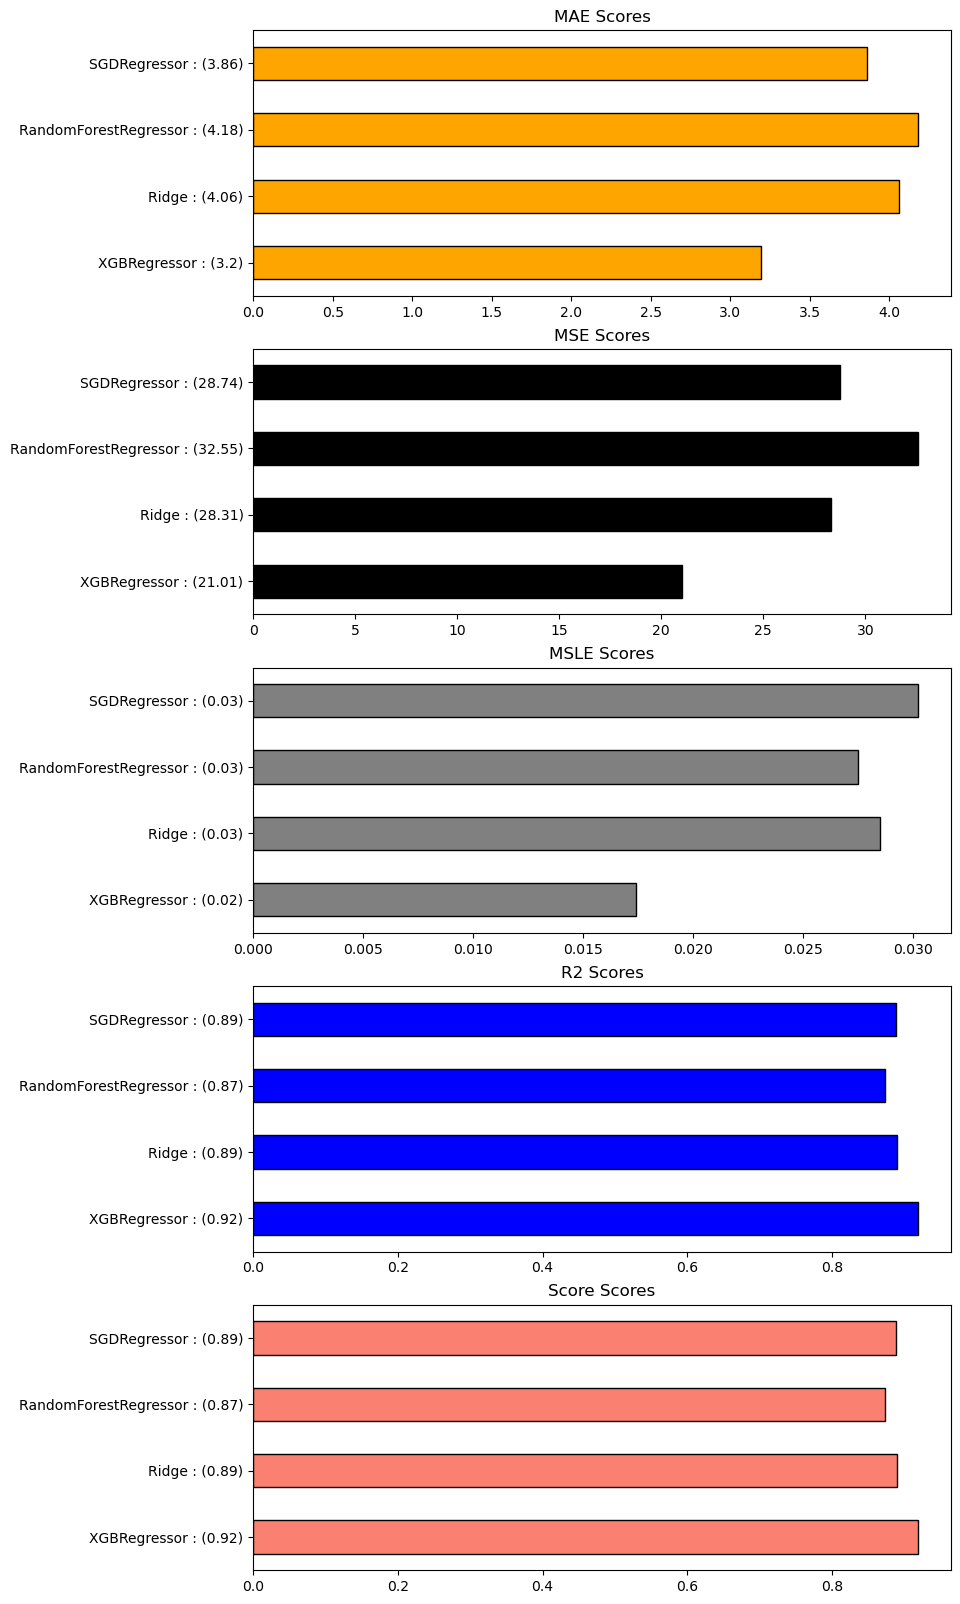

In [530]:
final_eval(c=8)